# 3 Exploratory Data Analysis<a id='3_Exploratory_Data_Analysis'></a>

## 3.1 Contents<a id='3.1_Contents'></a>
* [3 Exploratory Data Analysis](#2_Exploratory_Data_Analysis)
  * [3.1 Contents](#3.1_Contents)
  * [3.2 Introduction](#3.2_Introduction)
  * [3.3 Imports](#3.3_Imports)
  * [3.4 Load The Data](#3.4_Load_The_Data)
  * [3.5 Explore The Data](#3.5_Explore_The_Data)
    * [3.5.1 Top Store/Dept by Sales](#3.5.1_Top_Store/Dept_by_Sales)
    * [3.5.2 Weekly Sales Distribution for Each Store/Dept](#'3.5.2_Weekly_Sales_Distribution_for_Each_Store/Dept)
    * [3.5.3 Overview of Weekly Sales](#3.5.3_Overview_of_Weekly_Sales)
      * [3.5.3.1 Weekly Sales Distribution](#3.5.3.1_Weekly_Sales_Distribution)
      * [3.5.3.2 Average Weekly Sales](#3.5.3.2_Average_Weekly_Sales)
    * [3.5.4 Overview of Monthly Sales](#3.5.4_Overview_of_Monthly_Sales)
      * [3.5.4.1 Monthly Sales Distribution](#3.5.4.1_Monthly_Sales_Distribution)
      * [3.5.4.2 Average Weekly Sales](#3.5.4.2_Average_Weekly_Sales)
    * [3.5.5 Holiday Effects](#3.5.5_Holiday_Effects)
      * [3.5.5.1  Holiday Effects on Weekly Sales](#3.5.5.1_Holiday_Effects_on_Weekly_Sales)
      * [3.5.5.2 Holiday Effect on Markdowns](#3.5.5.2_Holiday_Effect_on_Markdowns)
    * [3.5.6 Correlation between Different Features](#3.5.6_Correlation_between_Different_Features)
      * [3.5.6.1 Correlation between All The Features](#3.5.6.1_Correlation_between_All_The_Features)
      * [3.5.6.2 Features Correlated with Weekly_Sales](#3.5.6.2_Features_Correlated_with_Weekly_Sales)
    * [3.5.7 Identify Time Gaps](#3.5.7_Identify_Time_Gaps)
      * [3.5.7.1 Summary of Time Gaps](#3.5.7.1_Summary_of_Time_Gaps)
  * [3.6 Individual Time Series Analysis](#3.6_Individual_Time_Series_Analysis)
    * [3.6.1 Time Series Without Time Gap](#3.6.1_Time_Series_Without_Time_Gap)
      * [3.6.1.1 Time Series Plots for Numerical Features](#3.6.1.1_Time_Series_Plots_for_Numerical_Features)
      * [3.6.1.2 Seasonal Plots](#3.6.1.2_Seasonal_Plots)
      * [3.6.1.3 Autocorrelation of Weekly_Sales](#3.6.1.3_Autocorrelation_of_Weekly_Sales)
      * [3.6.1.4 Lag Plots of Weekly_Sales](#3.6.1.4_Lag_Plots_of_Weekly_Sales)
      * [3.6.1.5 Pair Plots of Weekly_Sales](#3.6.1.5_Pair_Plots_of_Weekly_Sales)
    * [3.6.2 Time Series With Time Gap](#3.6.1_Time_Series_With_Time_Gap) 
  * [2.7 Save The dData](#2.7_Save_The_data)
  * [2.8 Summary](#2.8_Summary)


## 3.2 Introduction<a id='3.2_Introduction'></a>

The purpose of this data science project is to predict sales next three months for different Walmart stores and departments based on two past year sales history. This project aims to build predictive models for multiple time series for each store/dept. Such models will be used to provide guidance for the management team at Walmart to properly manage the inventory and allocate their resources, react to a market change, this may help prevent unnecessary money loss. The model can also be used to set sales target for sales department

## 3.3 Imports<a id='3.3_Imports'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
import os

import math

from datetime import datetime

from statsmodels.graphics.tsaplots import plot_acf

## 3.4 Load The Data <a id='3.4_Load_The_Data'></a>

In [2]:
df_ts = pd.read_pickle(r'C:/New folder/capstone 2/data/df_clean.pkl')  
df_ts.drop(['index'], axis=1,inplace=True)
df_ts.set_index("Date",inplace=True)
df_ts.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Holiday,Dept,Weekly_Sales,Type,Size
Date,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315
2010-02-12,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1,46039.49,A,151315
2010-02-19,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1,41595.55,A,151315
2010-02-26,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1,19403.54,A,151315
2010-03-05,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1,21827.90,A,151315


Reload the data frame where all the information are included: features, weekly sales, holidays, store size and type, etc

## 3.5. Explore The Data<a id='3.5_Explore_The_Data'></a>

### 3.5.1 Top Store/Dept by Sales<a id='3.5.1_Top_Store/Dept_by_Sales'></a>

In [3]:
#find total sales for each store and dept, and sort the value from high to low 
df_ts_sum = df_ts.groupby(['Store','Dept'])['Weekly_Sales'].sum().sort_values(ascending=False)
df_ts_sum.head()

Store  Dept
14     92      26101497.71
2      92      23572153.03
20     92      23542625.04
13     92      23170876.20
4      92      22789210.43
Name: Weekly_Sales, dtype: float64

top sales all comes from dept 92, the stores are 14,2,20,13,4

In [4]:
#find store with highest total sales
df_ts_store_sum = df_ts.groupby(['Store'])['Weekly_Sales'].sum().sort_values(ascending=False)
df_ts_store_sum.head()

Store
20    3.014014e+08
4     2.995453e+08
14    2.890019e+08
13    2.865180e+08
2     2.753872e+08
Name: Weekly_Sales, dtype: float64

same as the results in df_ts_sum, only the order changed a bit, this would help management understand which category of products are most popular and which locations are prefered. Maybe check is there is any crrelation between CPI/unemployment with the sales

### 3.5.2 Weekly Sales Distribution for Each Store/Dept<a id='3.5.2_Weekly_Sales_Distribution_for_Each_Store/Dept'></a>

<AxesSubplot:xlabel='Store', ylabel='Weekly_Sales'>

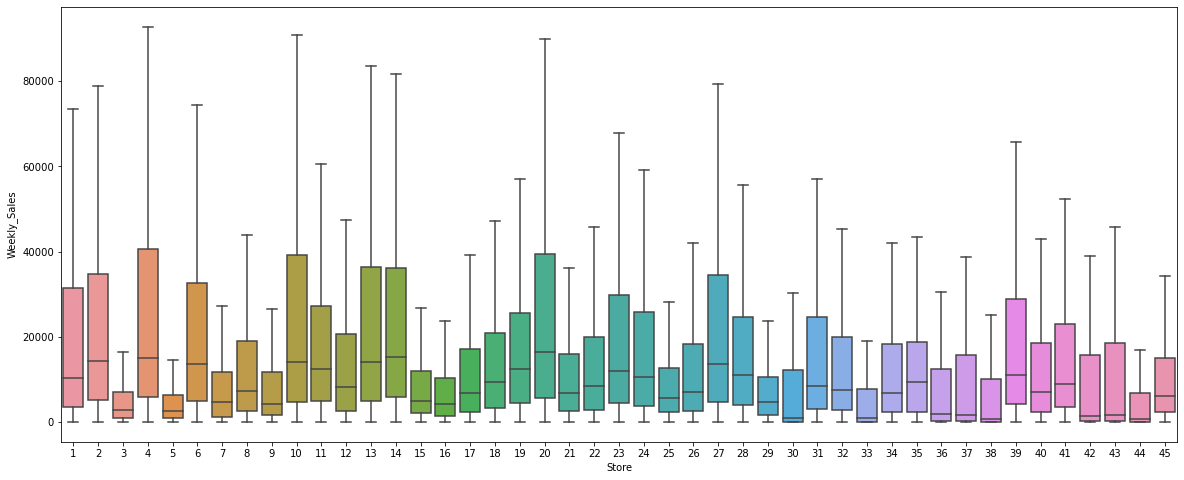

In [5]:
#Sales distribution for each store
plt.subplots(figsize=(20, 8))
sns.boxplot(x="Store", y="Weekly_Sales", showfliers=False, data=df_ts)

based on store sales distribution, sotre#20, 14,4 are top stores by average weekly_sales

<AxesSubplot:xlabel='Dept', ylabel='Weekly_Sales'>

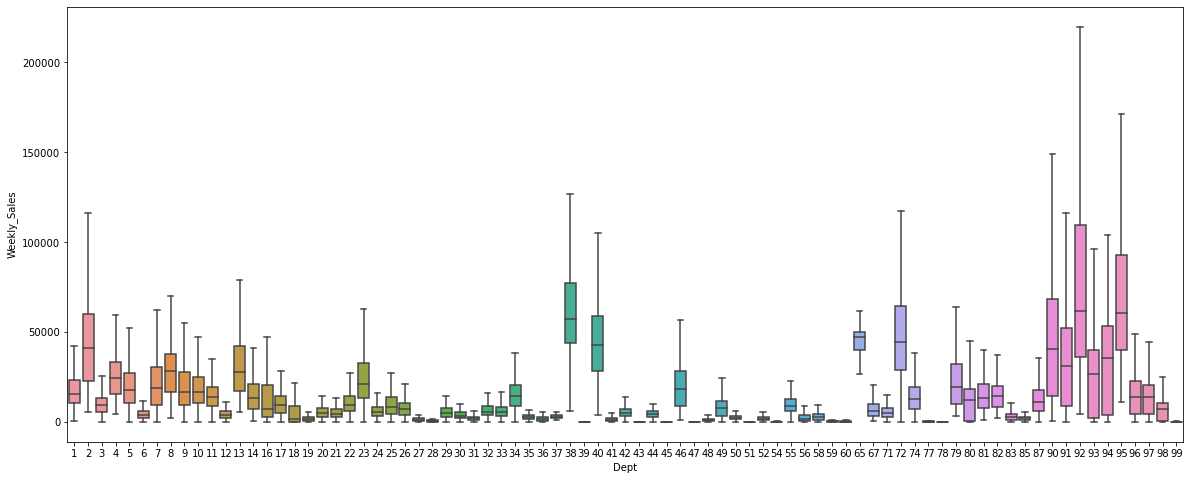

In [6]:
#check weekly sales distribution for all the department with no outliers
plt.subplots(figsize=(20, 8))
sns.boxplot(x="Dept", y="Weekly_Sales", showfliers=False, data=df_ts)

based on the weekly_sales distribution, dept 92 does have higher average weekly_sales comparing to other dept, and a lot outliers shown in most of the stores, dept 5, 7 and 72 have most of the outliers

### 3.5.3 Overview of Weekly Sales<a id='3.5.3_Overview_of_Weekly_Sales'></a>

In [7]:
#create week, month, year, season cols from the index col
df_ts_copy = df_ts.copy()
df_ts_copy['Year']=df_ts_copy.index.year
df_ts_copy['Month']=df_ts_copy.index.month
df_ts_copy['Week']=df_ts_copy.index.isocalendar().week
df_ts_copy['Weekday']=df_ts_copy.index.weekday
df_ts_copy['Season']=(df_ts_copy.index.month-1)%12//3+1
df_ts_copy.head()

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Holiday,Dept,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season
Date,,,,,,,,,,,,,,,,,,,,
2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,1,24924.50,A,151315,2010,2,5,4,1
2010-02-12,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,True,1,46039.49,A,151315,2010,2,6,4,1
2010-02-19,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,False,1,41595.55,A,151315,2010,2,7,4,1
2010-02-26,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,8.106,False,1,19403.54,A,151315,2010,2,8,4,1
2010-03-05,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,8.106,False,1,21827.90,A,151315,2010,3,9,4,1


### 3.5.3.1 Weekly Sales Distribution<a id='3.5.3.1_Weekly_Sales_Distribution'></a>

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

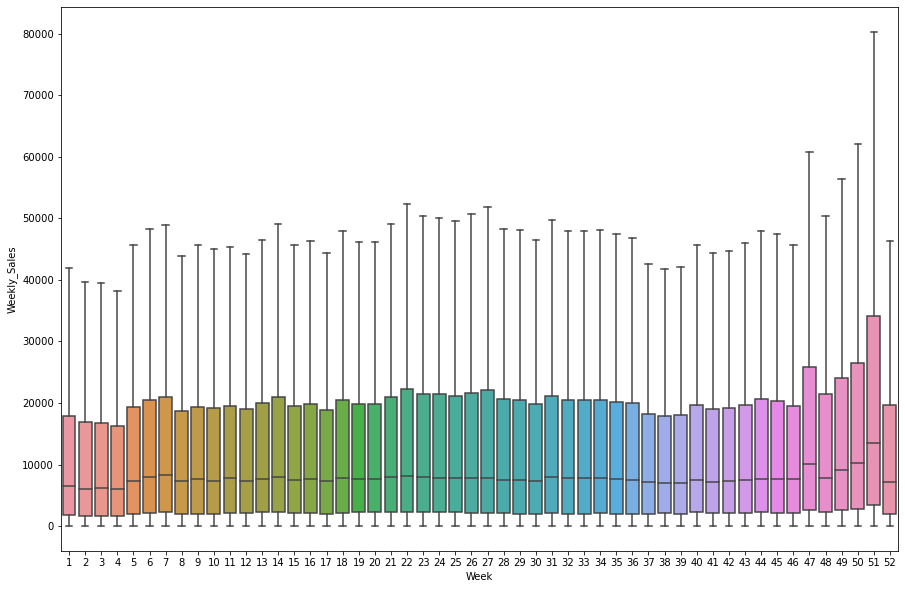

In [8]:
#find weekly sales distribution 
plt.subplots(figsize=(15, 10))
sns.boxplot(x="Week", y="Weekly_Sales", showfliers=False, data=df_ts_copy)

### 3.5.3.2 Average Weekly Sales<a id='3.5.3.2_Average_Weekly_Sales'></a>

In [9]:
#find average weekly_sales for each week during 2010,2011,2012
df_ts_week = df_ts_copy.groupby('Week')['Weekly_Sales'].mean().to_frame()
df_ts_week.head()

,Weekly_Sales
Week,
1,14928.038770
2,14090.537483
3,14123.750534
4,13564.804244
5,16069.522016


Text(0.5, 1.0, 'Average Weekly_Sales')

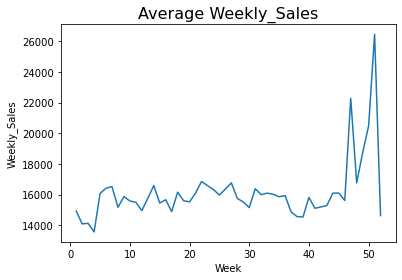

In [10]:
#plot average weekly sales 
df_ts_week.reset_index(inplace=True)

ax = sns.lineplot(x="Week", y="Weekly_Sales", data=df_ts_week)
ax.set_ylabel( "Weekly_Sales" , size = 10)
  
# Set title for plot
ax.set_title( "Average Weekly_Sales" , size = 16)

In [11]:
#have a close look at the average weekly sales for different years
df_ts_week_by_year = df_ts_copy.groupby(['Week','Year'])['Weekly_Sales'].mean().to_frame()
df_ts_week_by_year.head()

Weekly_Sales
Week Year              
1    2011  14679.587323
     2012  15172.381502
2    2011  13943.726767
     2012  14235.607558
3    2011  13970.742375

Text(0.5, 1.0, 'Average Weekly_Sales for different years')

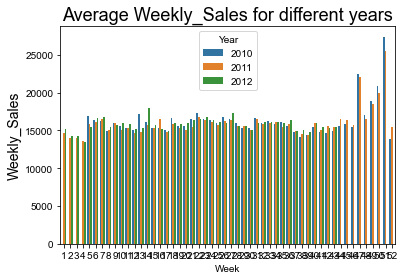

In [12]:
#compare the average weekly sales for different years
df_ts_week_by_year.reset_index(inplace=True)
ax = sns.barplot(x="Week", y="Weekly_Sales", hue="Year", data=df_ts_week_by_year)
ax.set_ylabel( "Weekly_Sales" , size = 14)
sns.set(rc={'figure.figsize':(20,15)}) 
# Set title for plot
ax.set_title( "Average Weekly_Sales for different years" , size = 18)

Average weekly sales show stable sales throughout the year till end of the year, sharp increase observed at end of the year, Nov and Dec

### 3.5.4 Overview of Monthly Sales <a id='3.5.4_Overview_of_Monthly_Sales'></a>

#### 3.5.4.1 Monthly Sales Distribution<a id='3.5.4.1_Monthly_Sales_Distribution'></a>

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

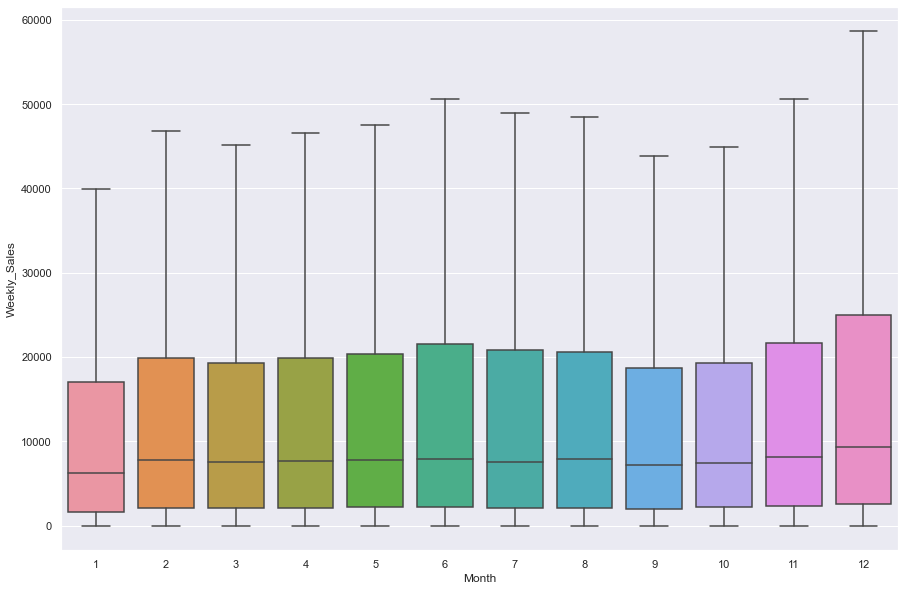

In [13]:
#find monthly sales distribution 
plt.subplots(figsize=(15, 10))
sns.boxplot(x="Month", y="Weekly_Sales", showfliers=False, data=df_ts_copy)

#### 3.5.4.2 Average Monthly Sales<a id='3.5.4.2_Average_Monthly_Sales'></a>

In [14]:
#find avearage monthly sales during 2010-2012
df_ts_mon_all = df_ts_copy.groupby('Month')['Weekly_Sales'].mean().to_frame()
df_ts_mon_all.head()

,Weekly_Sales
Month,
1,14177.402925
2,16044.626423
3,15462.397412
4,15693.388747
5,15843.753725


Text(0.5, 1.0, 'Average Monthly_Sales')

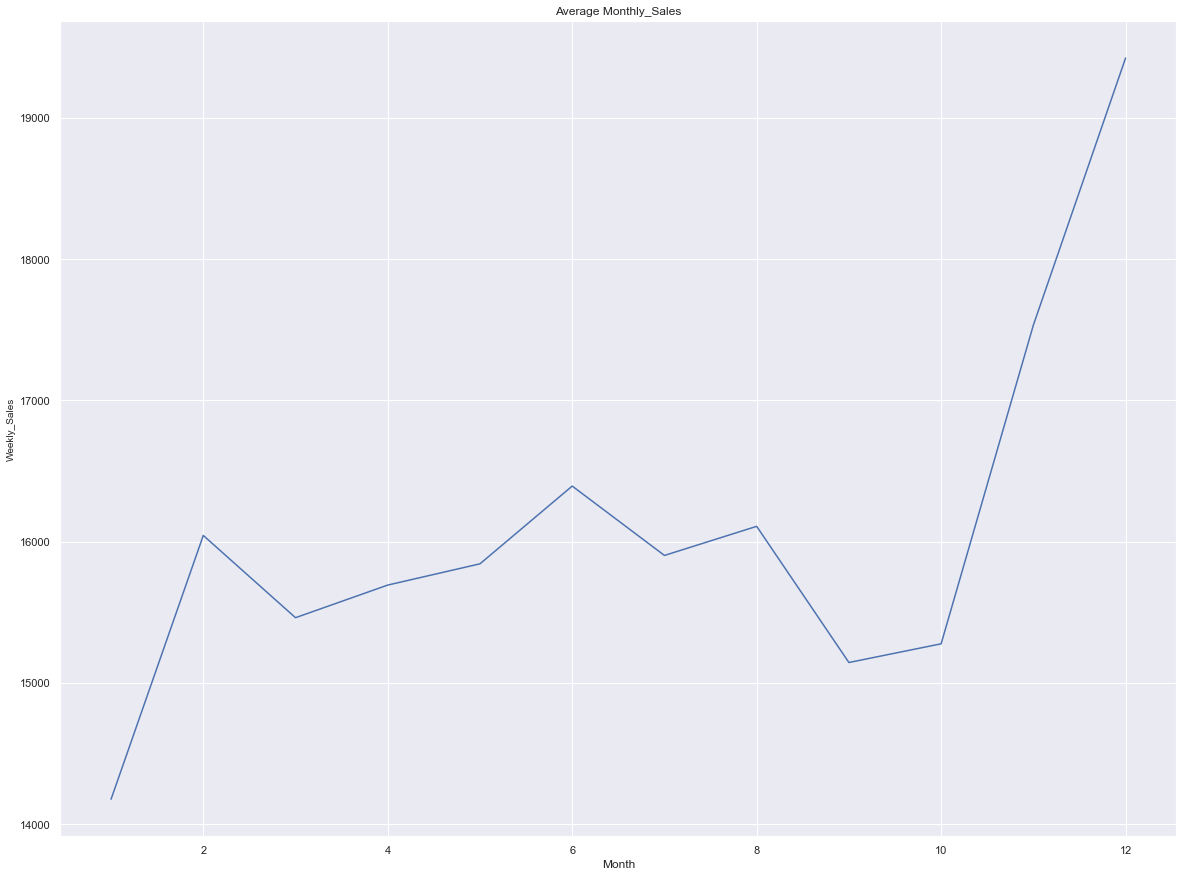

In [15]:
#plot average monthly sales 
df_ts_mon_all.reset_index(inplace=True)
ax = sns.lineplot(x="Month", y="Weekly_Sales", data=df_ts_mon_all)
ax.set_ylabel( "Weekly_Sales" , size = 10)
ax.set_title( "Average Monthly_Sales" , size = 12)

In [16]:
df_ts_mon = df_ts_copy.groupby(['Month','Year'])['Weekly_Sales'].mean().to_frame()
df_ts_mon.head()

Weekly_Sales
Month Year              
1     2011  14048.348515
      2012  14304.774064
2     2010  16115.148511
      2011  15904.117630
      2012  16112.853323

Text(0.5, 1.0, 'Average Monthly_Sales for different years')

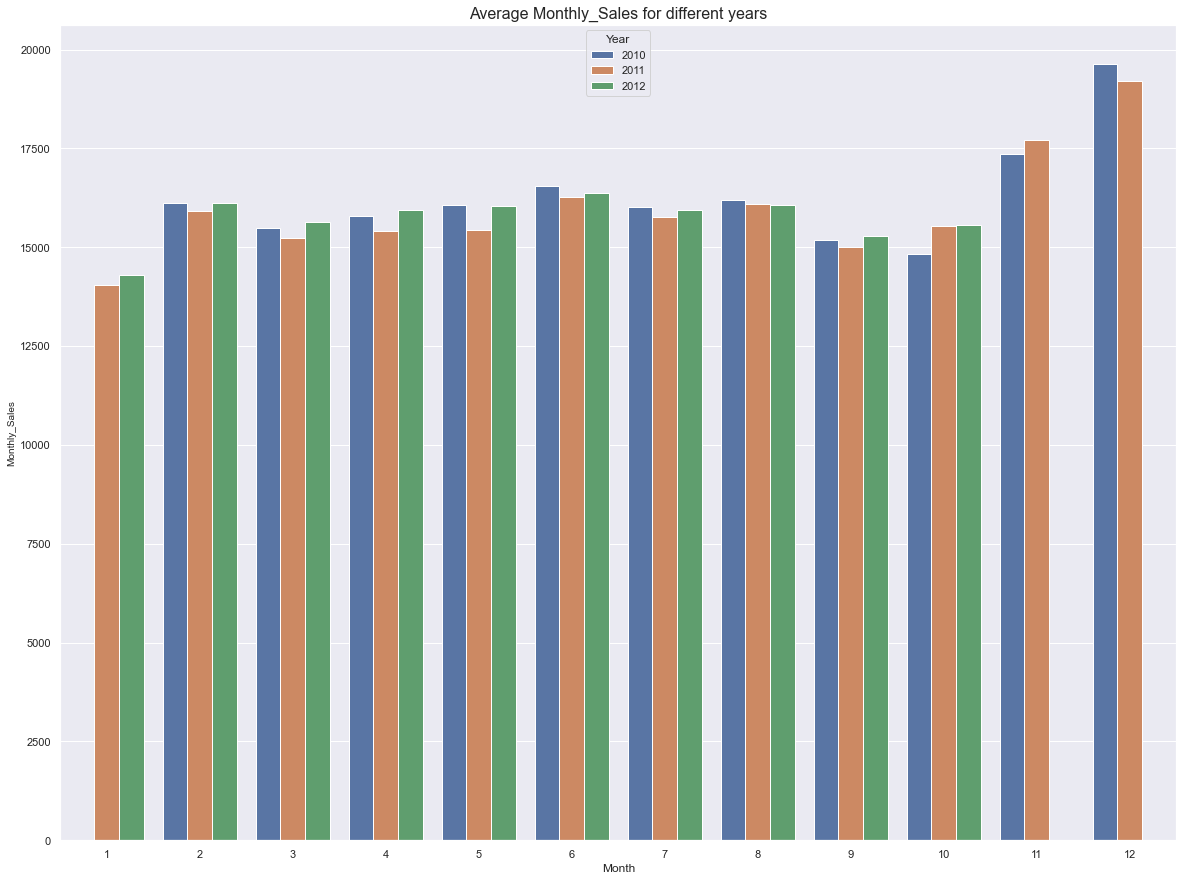

In [17]:
#compare the average monthly sales for different years
df_ts_mon.reset_index(inplace=True)

ax = sns.barplot(x="Month", y="Weekly_Sales", hue="Year", data=df_ts_mon)
ax.set_ylabel( "Monthly_Sales" , size = 10)
  
# Set title for plot
ax.set_title( "Average Monthly_Sales for different years" , size = 16)

Similar trend found for monthly sales to weekly sales, average monthly sales start from low in the begininig of the year, than slowly increase and stay stable till Sep, the sales drops a bit then followed by sharp increase surge at end of the year

### 3.5.5 Holiday Effects <a id='3.5.5_Holiday_Effects'></a>

#### 3.5.5.1 Holiday Effects on Weekly Sales <a id='3.5.5.1_Holiday_Effects_on_Weekly_Sales'></a>

In [18]:
#extract US holidays from library
#https://stackoverflow.com/questions/45682950/pandas-holidays-to-dataframe-with-holiday-name

from pandas.tseries.holiday import USFederalHolidayCalendar
#cal = USFederalHolidayCalendar()
#holidays = cal.rules

#print(holidays
      
sdt = datetime(2010, 2, 5)
edt = datetime(2012, 10, 26)
print("Holidays between 2010-02-05 and 2012-10-26 using the US federal holiday calendar.")
cal = USFederalHolidayCalendar()
holidays=cal.holidays(start=sdt, end=edt, return_name=True).to_frame()
print(holidays)

Holidays between 2010-02-05 and 2012-10-26 using the US federal holiday calendar.
                                              0
2010-02-15                Washington’s Birthday
2010-05-31                         Memorial Day
2010-07-05                     Independence Day
2010-09-06                            Labor Day
2010-10-11                         Columbus Day
2010-11-11                         Veterans Day
2010-11-25                     Thanksgiving Day
2010-12-24                        Christmas Day
2010-12-31                       New Year's Day
2011-01-17  Birthday of Martin Luther King, Jr.
2011-02-21                Washington’s Birthday
2011-05-30                         Memorial Day
2011-07-04                     Independence Day
2011-09-05                            Labor Day
2011-10-10                         Columbus Day
2011-11-11                         Veterans Day
2011-11-24                     Thanksgiving Day
2011-12-26                        Christmas Day
2012-0

In [19]:
#check col names in holidays df
holidays.reset_index(inplace=True)
holidays.head()

,index,0
0,2010-02-15,Washington’s Birthday
1,2010-05-31,Memorial Day
2,2010-07-05,Independence Day
3,2010-09-06,Labor Day
4,2010-10-11,Columbus Day


In [20]:
#rename the cols in holiday df
holidays.rename(columns={'index':'Date', 0:'Holiday_name'},inplace=True)
holidays.head()

,Date,Holiday_name
0,2010-02-15,Washington’s Birthday
1,2010-05-31,Memorial Day
2,2010-07-05,Independence Day
3,2010-09-06,Labor Day
4,2010-10-11,Columbus Day


In [21]:
#create superbowl df which contains the date for superbowl events during 2010-2012
superbowl = pd.DataFrame(
    {
        "Date": [ '2010-02-12', '2011-02-11', '2012-02-12'],
        "Holiday_name": ["Superbowl", "Superbowl", "Superbowl"]})
#change datatype of Date col to datetime format
superbowl.Date=pd.to_datetime(superbowl.Date,format="%Y-%m-%d")

In [22]:
#join superbowl df with holidays df vertically and create year, week cols in order to merge with weekly_sales df
Holidays=pd.concat([superbowl, holidays])
Holidays.set_index("Date", inplace=True)
Holidays['Year']=Holidays.index.year
Holidays['Week']=Holidays.index.isocalendar().week
Holidays.head()

,Holiday_name,Year,Week
Date,,,
2010-02-12,Superbowl,2010,6
2011-02-11,Superbowl,2011,6
2012-02-12,Superbowl,2012,6
2010-02-15,Washington’s Birthday,2010,7
2010-05-31,Memorial Day,2010,22


In [23]:
#reset df index to merge two dfs
Holidays=Holidays.reset_index(drop=True)
df_ts_copy.reset_index(inplace=True)
df_ts_FNL=df_ts_copy.merge(Holidays, how='left', on=['Year','Week'])
df_ts_FNL.head(20)

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,1,24924.50,A,151315,2010,2,5,4,1,NaN
1,2010-02-12,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,1,46039.49,A,151315,2010,2,6,4,1,Superbowl
2,2010-02-19,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,1,41595.55,A,151315,2010,2,7,4,1,Washington’s Birthday
3,2010-02-26,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,1,19403.54,A,151315,2010,2,8,4,1,NaN
4,2010-03-05,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,1,21827.90,A,151315,2010,3,9,4,1,NaN
5,2010-03-12,1,57.79,2.667,0.0,0.0,0.0,0.0,0.0,211.380643,...,1,21043.39,A,151315,2010,3,10,4,1,NaN
6,2010-03-19,1,54.58,2.720,0.0,0.0,0.0,0.0,0.0,211.215635,...,1,22136.64,A,151315,2010,3,11,4,1,NaN
7,2010-03-26,1,51.45,2.732,0.0,0.0,0.0,0.0,0.0,211.018042,...,1,26229.21,A,151315,2010,3,12,4,1,NaN
8,2010-04-02,1,62.27,2.719,0.0,0.0,0.0,0.0,0.0,210.820450,...,1,57258.43,A,151315,2010,4,13,4,2,NaN
9,2010-04-09,1,65.86,2.770,0.0,0.0,0.0,0.0,0.0,210.622857,...,1,42960.91,A,151315,2010,4,14,4,2,NaN


In [24]:
#find average weekly_sales during different holidays and compare them

#fill NAs in Holiday_name col with "non-holiday"
df_ts_FNL['Holiday_name'].fillna(value='non-Holiday',inplace=True)

#find average weekly_sales during different holidays & non-holidays and compare them
df_ts_holiday=df_ts_FNL.groupby('Holiday_name')['Weekly_Sales'].mean().to_frame().reset_index()
df_ts_holiday

,Holiday_name,Weekly_Sales
0,"Birthday of Martin Luther King, Jr.",14123.750534
1,Christmas Day,21387.213594
2,Columbus Day,15105.748007
3,Independence Day,16761.267581
4,Labor Day,15932.257230
5,Memorial Day,16852.791563
6,New Year's Day,14502.463792
7,Superbowl,16416.927383
8,Thanksgiving Day,22269.601768
9,Veterans Day,16096.508110


In [25]:
df_ts_FNL.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Dept,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,1,24924.50,A,151315,2010,2,5,4,1,non-Holiday
1,2010-02-12,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,1,46039.49,A,151315,2010,2,6,4,1,Superbowl
2,2010-02-19,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,1,41595.55,A,151315,2010,2,7,4,1,Washington’s Birthday
3,2010-02-26,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,1,19403.54,A,151315,2010,2,8,4,1,non-Holiday
4,2010-03-05,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,1,21827.90,A,151315,2010,3,9,4,1,non-Holiday


[Text(0, 0, 'Birthday of Martin Luther King, Jr.'),
 Text(1, 0, 'Christmas Day'),
 Text(2, 0, 'Columbus Day'),
 Text(3, 0, 'Independence Day'),
 Text(4, 0, 'Labor Day'),
 Text(5, 0, 'Memorial Day'),
 Text(6, 0, "New Year's Day"),
 Text(7, 0, 'Superbowl'),
 Text(8, 0, 'Thanksgiving Day'),
 Text(9, 0, 'Veterans Day'),
 Text(10, 0, 'Washington’s Birthday'),
 Text(11, 0, 'non-Holiday')]

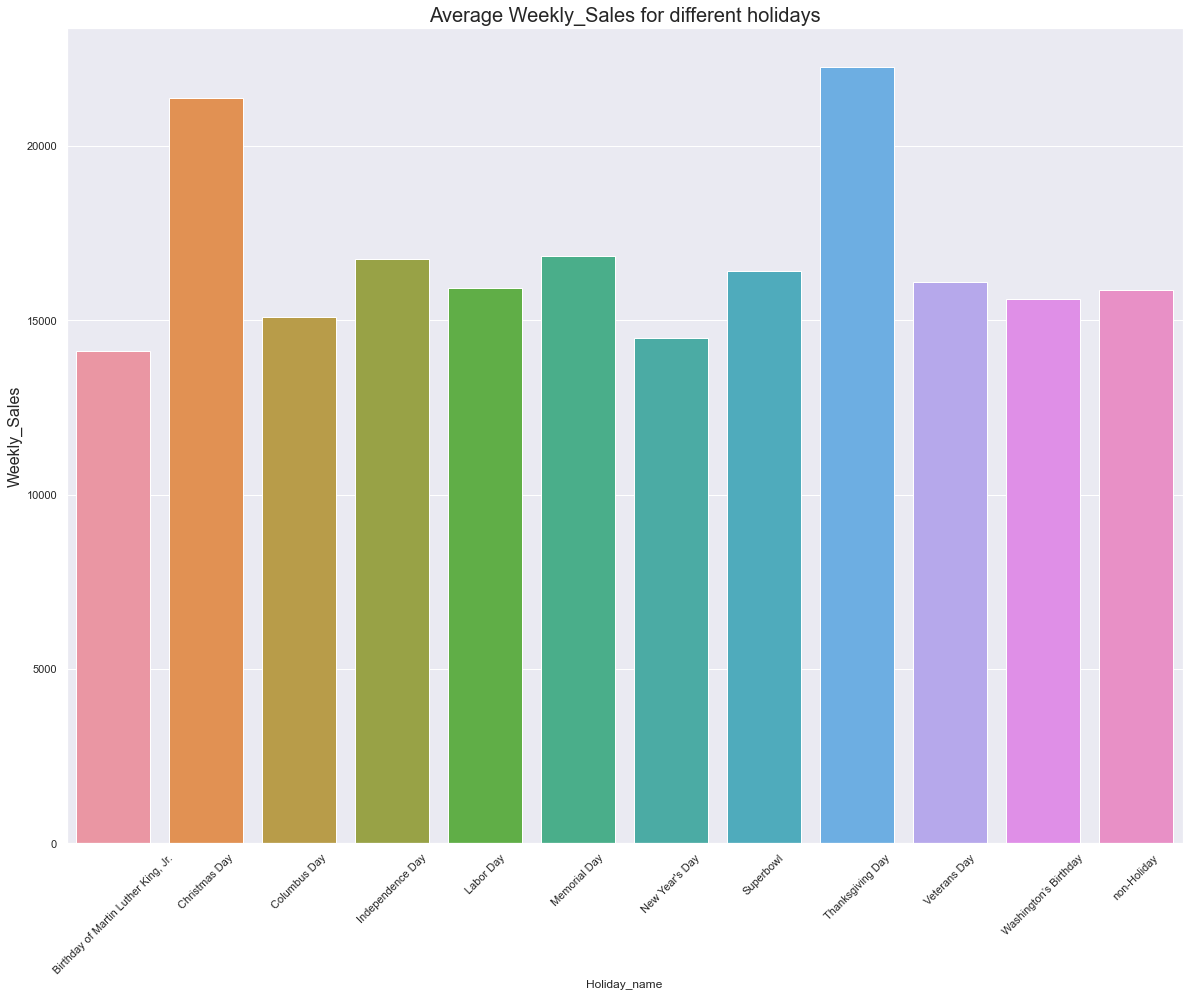

In [26]:
#compare weekly_sales for different holidays visually
ax = sns.barplot(x="Holiday_name", y="Weekly_Sales", data=df_ts_holiday)
ax.set_ylabel( "Weekly_Sales" , size = 16)
sns.set(rc={'figure.figsize':(15,10)}) 
# Set title for plot
ax.set_title( "Average Weekly_Sales for different holidays" , size =20)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

Based on the results, highest value of average weekly sales falls on the week of Thanksgiving and christmas, this explains why the sales values show highest at end of the year; The rest of holidays show no difference in sales comparing to non-holiday sales

#### 3.5.5.2 Holiday Effect on Markdowns <a id='3.5.5.2_Holiday_Effect_on_Markdowns'></a>

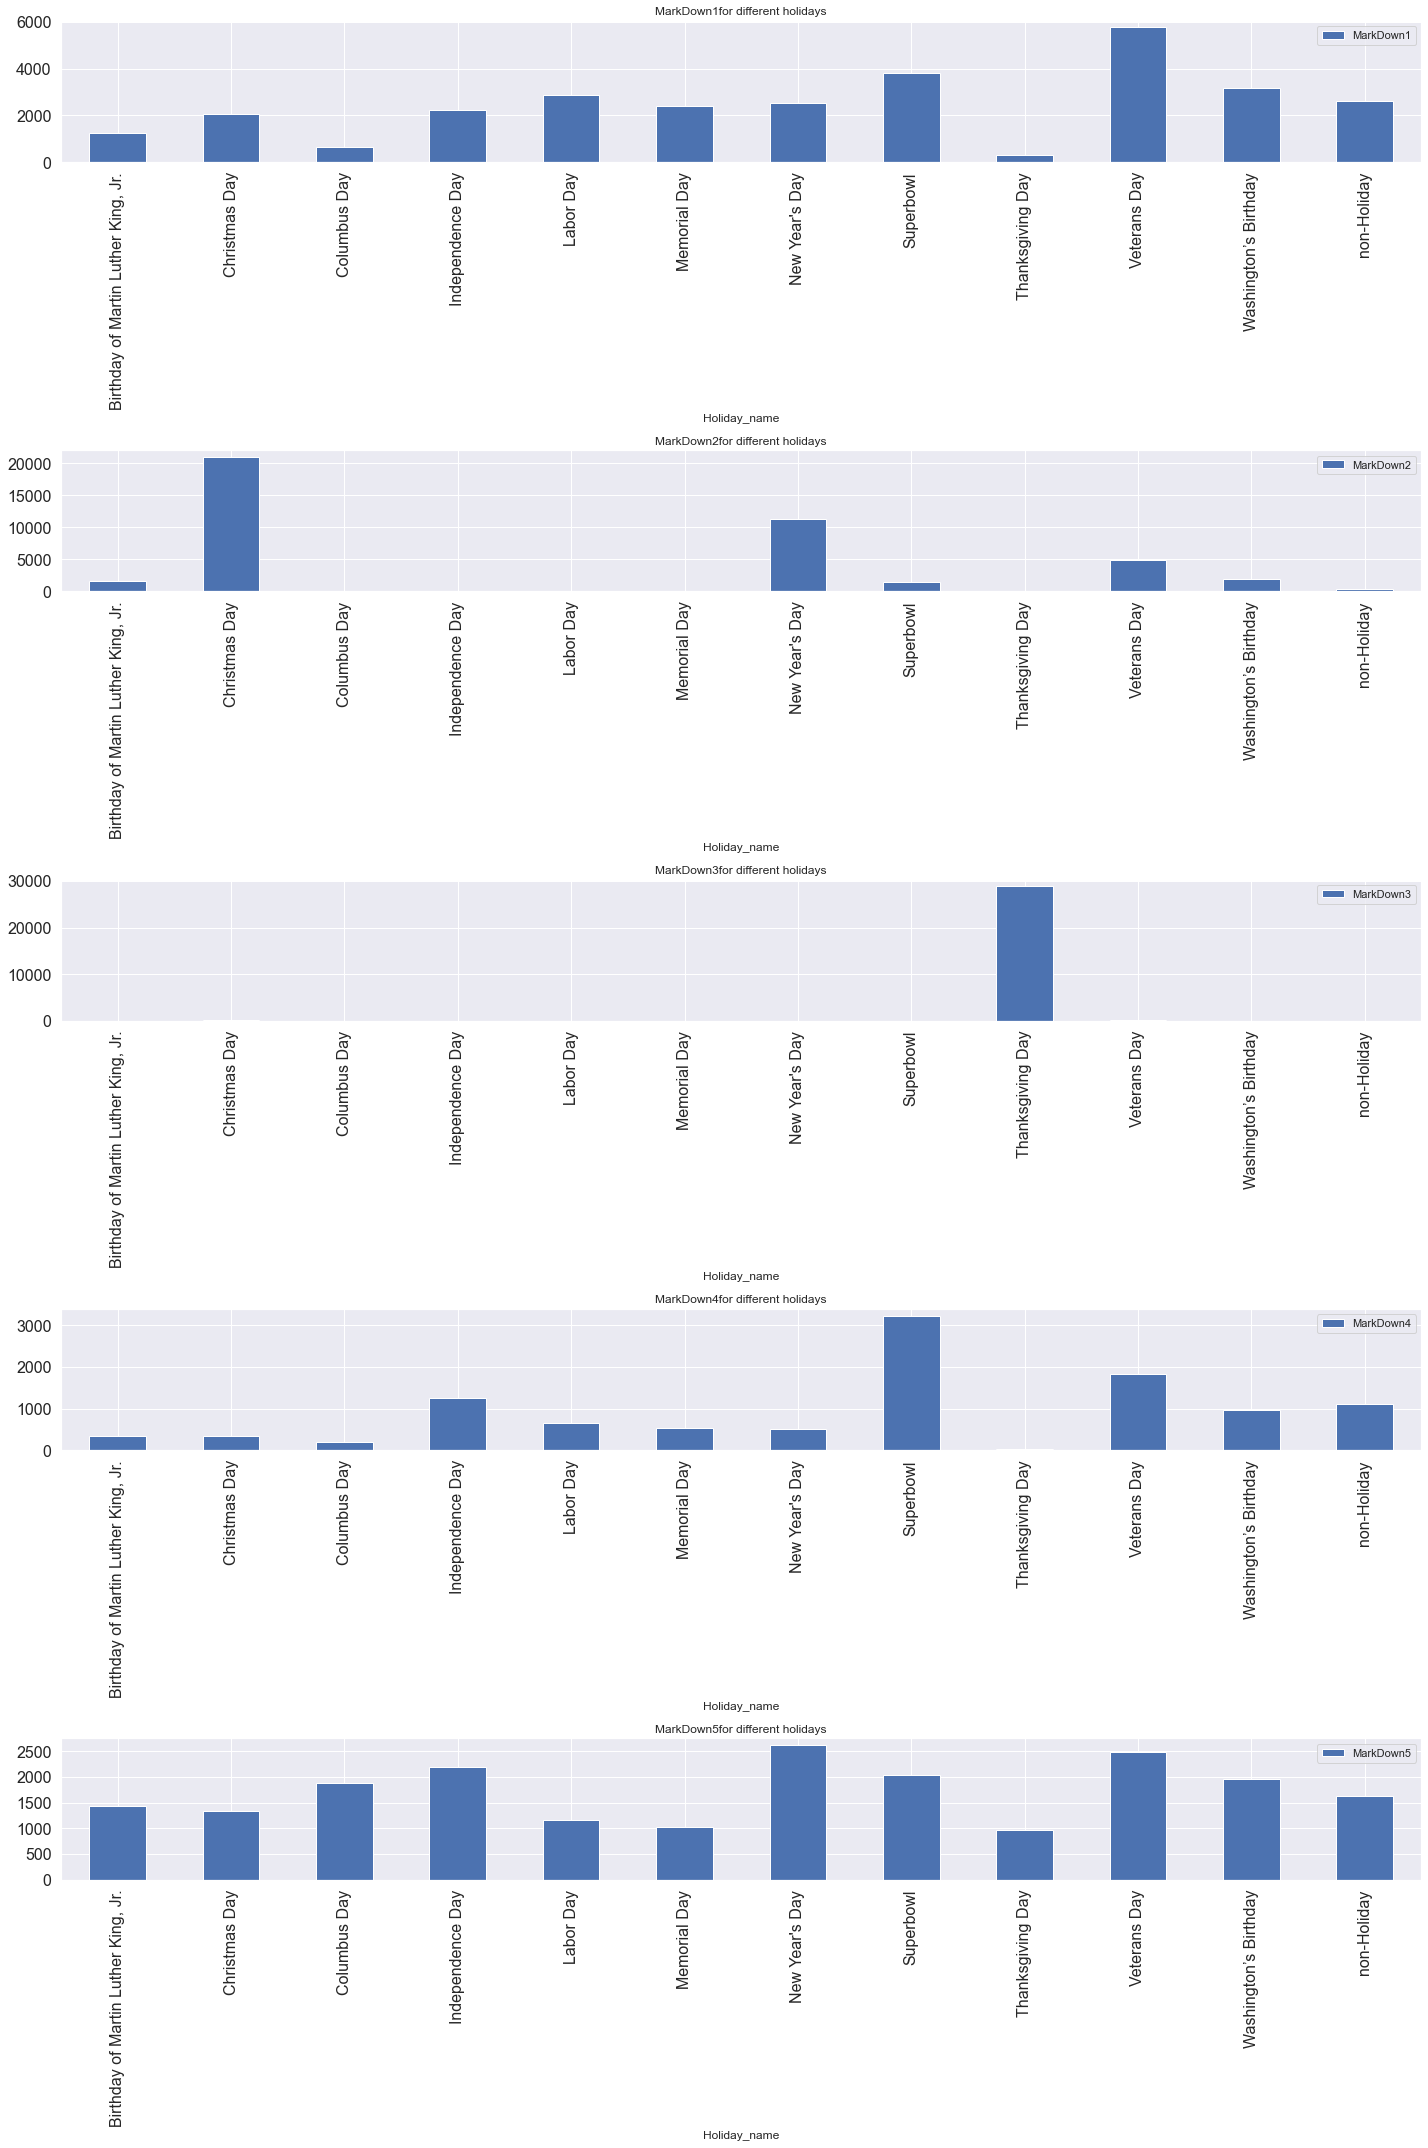

In [27]:
#check individual markdowns at different holidays
markdown=['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
n=len(markdown)
fig, axes = plt.subplots(nrows=n, ncols=1,figsize=(20,30))
for i in markdown:
    markdown_group=df_ts_FNL.groupby('Holiday_name')[i].mean().to_frame()
    index=markdown.index(i)
    markdown_group.plot.bar(ax=axes.flat[index], title=i+'for different holidays',fontsize=16)
fig.tight_layout()       

In [28]:
#create new col of markdown_tot
df_ts_FNL['MarkDown_Tot']=df_ts_FNL[['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']].sum(axis=1)


In [29]:
df_ts_FNL.columns

Index(['Date', 'Store', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment', 'Holiday',
       'Dept', 'Weekly_Sales', 'Type', 'Size', 'Year', 'Month', 'Week',
       'Weekday', 'Season', 'Holiday_name', 'MarkDown_Tot'],
      dtype='object')

[Text(0, 0, 'Birthday of Martin Luther King, Jr.'),
 Text(1, 0, 'Christmas Day'),
 Text(2, 0, 'Columbus Day'),
 Text(3, 0, 'Independence Day'),
 Text(4, 0, 'Labor Day'),
 Text(5, 0, 'Memorial Day'),
 Text(6, 0, "New Year's Day"),
 Text(7, 0, 'Superbowl'),
 Text(8, 0, 'Thanksgiving Day'),
 Text(9, 0, 'Veterans Day'),
 Text(10, 0, 'Washington’s Birthday'),
 Text(11, 0, 'non-Holiday')]

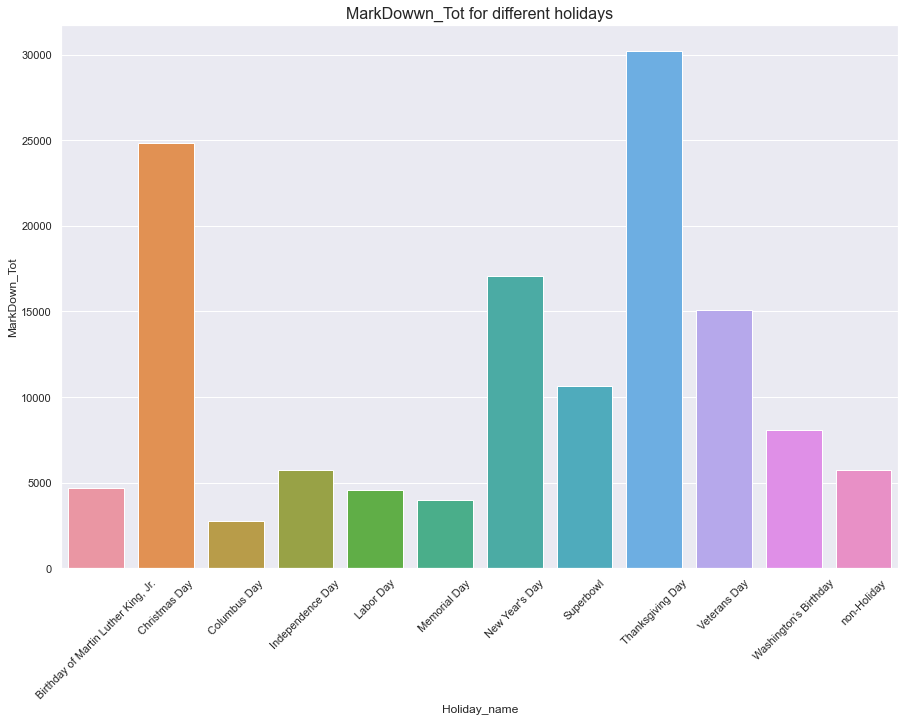

In [30]:
#check if markdown_tot has any correlation with different holidays
df_ts_markdown_tot=df_ts_FNL.groupby('Holiday_name')['MarkDown_Tot'].mean().to_frame().reset_index()
ax = sns.barplot(x="Holiday_name", y="MarkDown_Tot", data=df_ts_markdown_tot)
ax.set_ylabel( "MarkDown_Tot" , size = 12)
sns.set(rc={'figure.figsize':(15,10)}) 
# Set title for plot
ax.set_title( "MarkDowwn_Tot for different holidays" , size = 16)
ax.set_xticklabels(ax.get_xticklabels(),rotation=45)

This is used to check markdown strategies for different holidays.
No pattern was found in individual markdowns, total markdowns show higher value during thanksgiving and christmas, which align with high sales during these holidays.  
I ll use total markdowns for further analysis

## 3.5.6 Correlation between Different Features <a id='2.5.6_Correlation_between_Different_Features'></a>

#### 3.5.6.1 Correlation Between All The Features <a id='3.5.6.1_Correlation_Between_All_The_Features'></a>

In [31]:
corr = df_ts_FNL.corr(method='pearson')
corr

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Dept,Weekly_Sales,Size,Year,Month,Week,Weekday,Season,MarkDown_Tot
Store,1.000000,-0.049715,0.065921,-0.060426,-0.033823,-0.020348,-0.042730,-0.013019,-0.212750,0.208682,0.024236,-0.085099,-0.182784,0.002833,0.000926,0.000943,NaN,0.000950,-0.058880
Temperature,-0.049715,1.000000,0.142752,-0.028211,-0.179605,-0.055921,-0.051413,-0.016567,0.182257,0.097213,0.004827,-0.002393,-0.058799,0.063251,0.236047,0.236346,NaN,0.245138,-0.112699
Fuel_Price,0.065921,0.142752,1.000000,0.295830,0.029953,0.018957,0.166486,0.214419,-0.164176,-0.033860,0.003580,-0.000285,0.001910,0.779170,-0.040514,-0.030851,NaN,-0.041154,0.243792
MarkDown1,-0.060426,-0.028211,0.295830,1.000000,0.175646,-0.014254,0.839344,0.414842,0.011308,-0.105764,0.001439,0.046978,0.168847,0.500092,-0.089293,-0.093704,NaN,-0.108808,0.805075
MarkDown2,-0.033823,-0.179605,0.029953,0.175646,1.000000,-0.006139,0.113656,0.132395,-0.003681,-0.041707,0.000424,0.021037,0.078690,0.133246,-0.019577,-0.013024,NaN,-0.019807,0.481779
MarkDown3,-0.020348,-0.055921,0.018957,-0.014254,-0.006139,1.000000,-0.011966,0.042775,-0.005949,-0.018168,0.001514,0.038622,0.033802,0.007195,0.116223,0.122523,NaN,0.114995,0.376404
MarkDown4,-0.042730,-0.051413,0.166486,0.839344,0.113656,-0.011966,1.000000,0.303713,-0.001658,-0.077022,0.001882,0.037475,0.127510,0.335352,-0.105974,-0.114585,NaN,-0.115346,0.729493
MarkDown5,-0.013019,-0.016567,0.214419,0.414842,0.132395,0.042775,0.303713,1.000000,0.068218,-0.121127,0.002750,0.050299,0.152314,0.402360,0.056701,0.056559,NaN,0.039055,0.596826
CPI,-0.212750,0.182257,-0.164176,0.011308,-0.003681,-0.005949,-0.001658,0.068218,1.000000,-0.298982,-0.007139,-0.020997,-0.003794,0.074760,0.004871,0.005955,NaN,0.004705,0.020130
Unemployment,0.208682,0.097213,-0.033860,-0.105764,-0.041707,-0.018168,-0.077022,-0.121127,-0.298982,1.000000,0.007731,-0.025900,-0.068722,-0.237301,-0.012609,-0.015599,NaN,-0.017877,-0.119398


[]

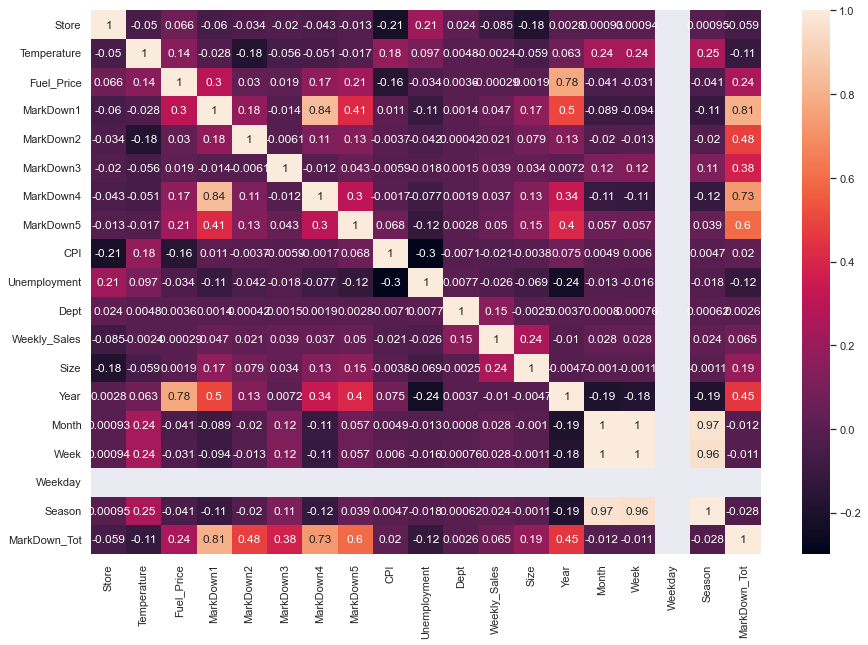

In [32]:
#create heatmap of correlations between different features
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True)
plt.plot()

when check the correlation function, no clear correlation was found between weekly_sales and other features, except for the size which has correlaction factor of 0.24, dept of 0.15
markdown_tot has relatively high correlation with markdown_1 and markdown_4, it also show some correlation with fuel price and calendar year
fuel price seem to be correlated with year
season might not be a useful feature since it highly corelated with week and month
.....

#### 2.5.6.2 Features Correlated with Weekly_Sales <a id='2.5.6.2_Features_Correlated_with_Weekly_Sales'></a>

In [33]:
#select weekly_sales col in corr df and rank in the correlation coefficient from high to low
weekly_sales_corr =corr.loc['Weekly_Sales'].to_frame()
weekly_sales_corr.sort_values(by='Weekly_Sales', ascending=False, inplace=True)
weekly_sales_corr

,Weekly_Sales
Weekly_Sales,1.000000
Size,0.244089
Dept,0.148704
MarkDown_Tot,0.064988
MarkDown5,0.050299
MarkDown1,0.046978
MarkDown3,0.038622
MarkDown4,0.037475
Month,0.028431
Week,0.027689


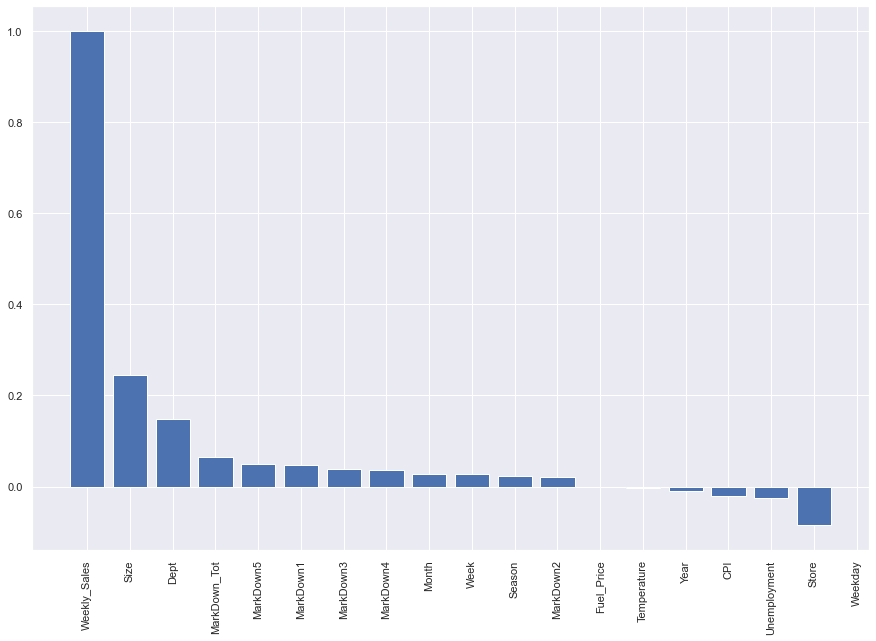

In [34]:
#create barplot to show the correlation coff from high to low
plt.bar(weekly_sales_corr.index, weekly_sales_corr['Weekly_Sales'])
plt.xticks(rotation='vertical')
plt.show()


size, dept and markdown_total are show relatively higher correlation with weekly_sales, store shows negative correlation with weekly_sales

### 3.5.7 Identify Time Gaps<a id='3.5.7_Identify_Time_Gaps'></a>

#### 3.5.7.1 Summary of Time Gaps<a id='3.5.7.1_Summary_of_Time_Gaps'></a>

In [35]:
#select subset of df_ts_FNL df with only information of date, store and dept
df_ts_SPL=df_ts_FNL[['Date','Store','Dept']]

In [36]:
#create new cols to identify time gap between two adjent rows are larger than 1 week
df_ts_SPL['gap'] = df_ts_SPL.groupby(['Store','Dept'])['Date'].transform(lambda s: s.shift(-1) > s+pd.Timedelta("1w"))

#create a new col where the date col is shift upwards by 1 row
df_ts_SPL['shift']=df_ts_SPL.groupby(['Store','Dept'])['Date'].shift(-1)

C:\Users\ygao10\AppData\Local\Temp\ipykernel_15748\228196484.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts_SPL['gap'] = df_ts_SPL.groupby(['Store','Dept'])['Date'].transform(lambda s: s.shift(-1) > s+pd.Timedelta("1w"))
C:\Users\ygao10\AppData\Local\Temp\ipykernel_15748\228196484.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts_SPL['shift']=df_ts_SPL.groupby(['Store','Dept'])['Date'].shift(-1)


In [37]:
#print the rows(time series) where time gap exists
df_ts_SPL_gap=df_ts_SPL[df_ts_SPL['gap']==True]
df_ts_SPL_gap.head()

,Date,Store,Dept,gap,shift
845,2012-08-03,1,6,True,2012-08-17
2298,2010-04-23,1,18,True,2010-05-14
2299,2010-05-14,1,18,True,2010-06-04
2301,2010-06-11,1,18,True,2010-08-20
2342,2011-05-27,1,18,True,2011-06-10


In [38]:
#find store/dept where there is time gap
df_ts_gap=df_ts_SPL[df_ts_SPL['gap']==True].groupby(['Store','Dept']).size().to_frame()
df_ts_gap.rename(columns={0:'num_of_gaps'},inplace=True)
df_ts_gap.head()

num_of_gaps
Store Dept             
1     6               1
      18             11
      45             21
      47             10
      48             11

Text(0.5, 1.0, 'Distribution of num of gaps for time series with gaps')

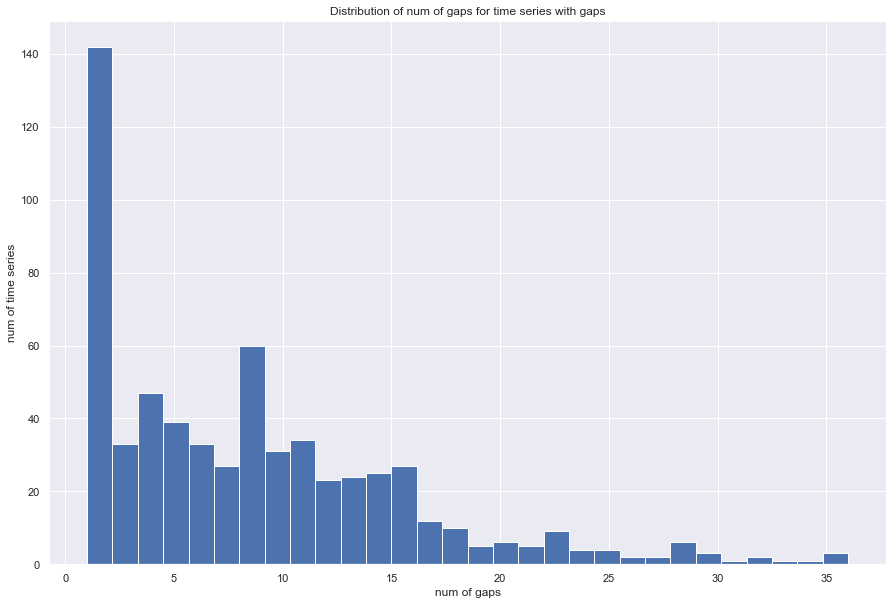

In [39]:
#plot histgram of time series with different num of gaps
df_ts_gap.hist(bins=30)
plt.ylabel('num of time series')
plt.xlabel('num of gaps')
plt.title('Distribution of num of gaps for time series with gaps')

In [40]:
df_ts_SPL_gap[(df_ts_SPL_gap.Store==1)&(df_ts_SPL_gap.Dept==18)]

,Date,Store,Dept,gap,shift
2298,2010-04-23,1,18,True,2010-05-14
2299,2010-05-14,1,18,True,2010-06-04
2301,2010-06-11,1,18,True,2010-08-20
2342,2011-05-27,1,18,True,2011-06-10
2344,2011-06-17,1,18,True,2011-07-01
2345,2011-07-01,1,18,True,2011-07-15
2346,2011-07-15,1,18,True,2011-08-26
2382,2012-04-27,1,18,True,2012-05-11
2383,2012-05-11,1,18,True,2012-05-25
2386,2012-06-08,1,18,True,2012-07-20


In [41]:
#calculate time difference between shift col and Date col and convert the days into integer, and calculate the missing week between each time gap
#this method only calculate the missing weeks within the time range for each store-dept, it does not neccessarily tell total missing weeks from Feb.05,2010 to Oct. 26,2012
df_ts_SPL_gap['delta_days']=(df_ts_SPL_gap['shift']-df_ts_SPL_gap['Date']).dt.days.astype('int16')

df_ts_SPL_gap['missing_week']=(df_ts_SPL_gap['delta_days']/7-1).astype('int16')

df_ts_SPL_gap[(df_ts_SPL_gap.Store==1)&(df_ts_SPL_gap.Dept==18)]


C:\Users\ygao10\AppData\Local\Temp\ipykernel_15748\385562610.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts_SPL_gap['delta_days']=(df_ts_SPL_gap['shift']-df_ts_SPL_gap['Date']).dt.days.astype('int16')
C:\Users\ygao10\AppData\Local\Temp\ipykernel_15748\385562610.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ts_SPL_gap['missing_week']=(df_ts_SPL_gap['delta_days']/7-1).astype('int16')


,Date,Store,Dept,gap,shift,delta_days,missing_week
2298,2010-04-23,1,18,True,2010-05-14,21,2
2299,2010-05-14,1,18,True,2010-06-04,21,2
2301,2010-06-11,1,18,True,2010-08-20,70,9
2342,2011-05-27,1,18,True,2011-06-10,14,1
2344,2011-06-17,1,18,True,2011-07-01,14,1
2345,2011-07-01,1,18,True,2011-07-15,14,1
2346,2011-07-15,1,18,True,2011-08-26,42,5
2382,2012-04-27,1,18,True,2012-05-11,14,1
2383,2012-05-11,1,18,True,2012-05-25,14,1
2386,2012-06-08,1,18,True,2012-07-20,42,5


In [42]:
#create new col to calculate of number of missing weeks for each time series
df_ts_time_gap=df_ts_SPL_gap.groupby(['Store','Dept'])['missing_week'].sum().to_frame()
df_ts_time_gap

missing_week
Store Dept              
1     6                1
      18              31
      45              72
      47             126
      48              19
...                  ...
45    78              67
      80              16
      94               8
      96              25
      98               8

[621 rows x 1 columns]

In [43]:
df_ts_time_gap.rename(columns={'missing_week':'missing_gap'},inplace=True)

In [44]:
df_ts_time_gap

missing_gap
Store Dept             
1     6               1
      18             31
      45             72
      47            126
      48             19
...                 ...
45    78             67
      80             16
      94              8
      96             25
      98              8

[621 rows x 1 columns]

In [45]:
df_ts_SPL_sales=df_ts_FNL[['Date','Store','Dept','Weekly_Sales']].groupby(['Store','Dept'])
df_ts_SPL_sales.head()

,Date,Store,Dept,Weekly_Sales
0,2010-02-05,1,1,24924.50
1,2010-02-12,1,1,46039.49
2,2010-02-19,1,1,41595.55
3,2010-02-26,1,1,19403.54
4,2010-03-05,1,1,21827.90
...,...,...,...,...
420150,2010-02-05,45,98,347.23
420151,2010-02-12,45,98,553.25
420152,2010-02-19,45,98,281.00
420153,2010-02-26,45,98,2.50


In [46]:
index = pd.date_range('2/5/2010', periods=143, freq='W-FRI').to_frame()
index

,0
2010-02-05,2010-02-05
2010-02-12,2010-02-12
2010-02-19,2010-02-19
2010-02-26,2010-02-26
2010-03-05,2010-03-05
...,...
2012-09-28,2012-09-28
2012-10-05,2012-10-05
2012-10-12,2012-10-12
2012-10-19,2012-10-19


In [47]:
df_ts_merge=df_ts_SPL_sales.get_group((1,6)).set_index('Date').merge(index,how='right',left_index=True, right_index=True)

In [48]:
 df_ts_merge['Weekly_Sales'].isnull().sum()

1

In [51]:
my_dict={}
for key in df_ts_SPL_sales.groups.keys():
    df_ts_merge=df_ts_SPL_sales.get_group(key).set_index('Date').merge(index,how='right',left_index=True, right_index=True)
    if df_ts_merge['Weekly_Sales'].isnull().sum()>0:
        my_dict.update({key:df_ts_merge['Weekly_Sales'].isnull().sum()})
        
    else: 
        continue            
    

In [52]:
df_ts_missing = pd.Series(my_dict).reset_index()   
df_ts_missing.columns = ['Store', 'Dept', 'missing_weeks']   
df_ts_missing

,Store,Dept,missing_weeks
0,1,6,1
1,1,18,31
2,1,45,72
3,1,47,130
4,1,48,19
...,...,...,...
690,45,78,135
691,45,80,19
692,45,94,9
693,45,96,141


In [53]:
#get percentage of missing weeks 
df_ts_missing=pd.concat([df_ts_missing,df_ts_missing.missing_weeks/143],axis=1)
df_ts_missing.columns=['Store','Dept','missing_weeks','missing_percent']
df_ts_missing.sort_values('missing_percent')


,Store,Dept,missing_weeks,missing_percent
0,1,6,1,0.006993
536,37,9,1,0.006993
510,36,11,1,0.006993
65,6,36,1,0.006993
299,22,58,1,0.006993
...,...,...,...,...
521,36,33,142,0.993007
234,18,48,142,0.993007
401,29,99,142,0.993007
624,42,41,142,0.993007


In [54]:
df_ts_missing_merge=df_ts_missing.set_index(['Store','Dept']).merge(df_ts_time_gap,how='left',left_index=True, right_index=True)

In [55]:
df_ts_missing_merge.sort_values('missing_percent',ascending=False)

missing_weeks  missing_percent  missing_gap
Store Dept                                             
36    33              142         0.993007          NaN
7     78              142         0.993007          NaN
21    48              142         0.993007          NaN
      50              142         0.993007          NaN
9     78              142         0.993007          NaN
...                   ...              ...          ...
20    58                1         0.006993          1.0
17    56                1         0.006993          1.0
44    12                1         0.006993          1.0
16    56                1         0.006993          1.0
1     6                 1         0.006993          1.0

[695 rows x 3 columns]

Text(0.5, 1.0, 'Distribution of num of missing_weeks for time series')

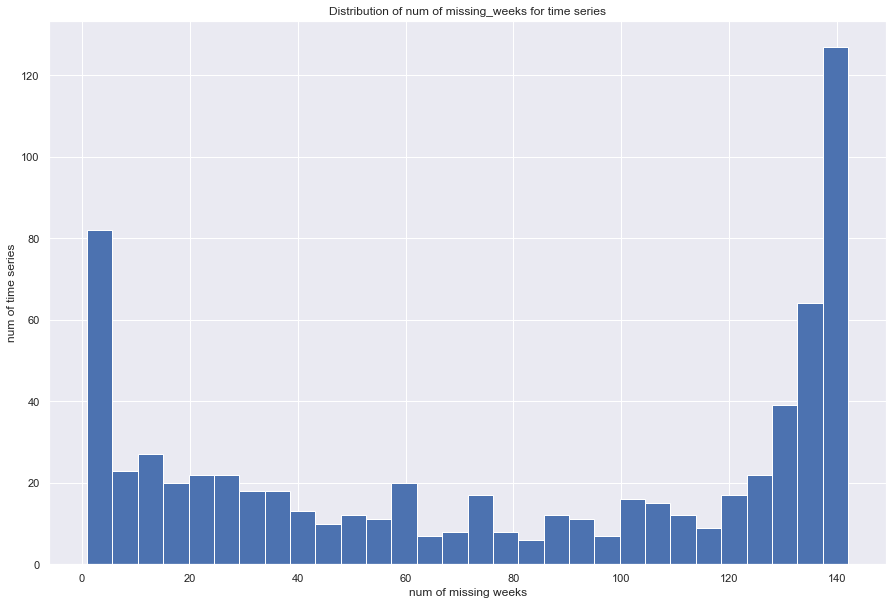

In [56]:
df_ts_missing_merge.missing_weeks.hist(bins=30)
plt.ylabel('num of time series')
plt.xlabel('num of missing weeks')
plt.title('Distribution of num of missing_weeks for time series')

In [57]:
#find # of time series which has missing values less than 10%
df_ts_missing_merge[df_ts_missing_merge['missing_percent']<0.1]

missing_weeks  missing_percent  missing_gap
Store Dept                                             
1     6                 1         0.006993          1.0
      54               13         0.090909         13.0
2     48                5         0.034965          5.0
      54               13         0.090909         13.0
3     32                1         0.006993          1.0
...                   ...              ...          ...
44    72                3         0.020979          3.0
      85                5         0.034965          5.0
45    58                4         0.027972          4.0
      94                9         0.062937          8.0
      98                8         0.055944          8.0

[126 rows x 3 columns]

In [58]:
#find # of time series which has missing values more than 50%
df_ts_missing_merge[df_ts_missing_merge['missing_percent']>0.5]

missing_weeks  missing_percent  missing_gap
Store Dept                                             
1     45               72         0.503497         72.0
      47              130         0.909091        126.0
      51              110         0.769231          4.0
      77              140         0.979021          6.0
      78              139         0.972028         74.0
...                   ...              ...          ...
45    49               86         0.601399         56.0
      51              121         0.846154         60.0
      77              136         0.951049         14.0
      78              135         0.944056         67.0
      96              141         0.986014         25.0

[382 rows x 3 columns]

In [59]:
#total # of time series with time gap
df_ts_missing.shape

(695, 4)

total # of time series with time gap is 695, which take account of ~21% of all the time series. Out of all the time series with time gaps, only 18% has missing values less than 10%, 55% has missing value more than 50%


## 3.6 Individual Time Series Analysis<a id='3.6_Individual_Time_Series_Analysis'></a>

### 3.6.1 Time Series Without Time Gap<a id='3.6.1_Time_Series_Without_Time_Gap'></a>

Based on the analysis in sec 3.5.1, Store 14/Dept 92 has highest sales across all the store and dept. I ll start with this time series

#### 3.6.1.1 Time Series Plots for Numerical Features<a id='3.6.1.1_Time_Series_Plots_for_Numerical_Features'></a>

In [60]:
#check if store14/dept 92 is in index of df_ts_missing_merge since df_ts_missing_merge.index contains all store/dept combination with missing values
(14,92) in df_ts_missing_merge.index

False

the results indicates there is no missing date in this time series

In [61]:
#review of master table which contains all the information for all store/dept
df_ts_FNL.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name,MarkDown_Tot
0,2010-02-05,1,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,...,24924.50,A,151315,2010,2,5,4,1,non-Holiday,0.0
1,2010-02-12,1,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,...,46039.49,A,151315,2010,2,6,4,1,Superbowl,0.0
2,2010-02-19,1,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,...,41595.55,A,151315,2010,2,7,4,1,Washington’s Birthday,0.0
3,2010-02-26,1,46.63,2.561,0.0,0.0,0.0,0.0,0.0,211.319643,...,19403.54,A,151315,2010,2,8,4,1,non-Holiday,0.0
4,2010-03-05,1,46.50,2.625,0.0,0.0,0.0,0.0,0.0,211.350143,...,21827.90,A,151315,2010,3,9,4,1,non-Holiday,0.0


In [62]:
#select data for store14 dept 19
df_s14_d92=df_ts_FNL[(df_ts_FNL['Store']==14)&(df_ts_FNL['Dept']==92)]

In [63]:
#check missing values for all cols
df_sd_missing = pd.concat([df_s14_d92.isnull().sum(), 100 * df_s14_d92.isnull().mean()],axis=1)
df_sd_missing.columns=['count','%']
df_sd_missing

,count,%
Date,0,0.000000
Store,0,0.000000
Temperature,1,0.699301
Fuel_Price,1,0.699301
MarkDown1,1,0.699301
MarkDown2,1,0.699301
MarkDown3,1,0.699301
MarkDown4,1,0.699301
MarkDown5,1,0.699301
CPI,1,0.699301


In [64]:
df_s14_d92[df_s14_d92.isnull().any(axis=1)]

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name,MarkDown_Tot
137017,2012-07-13,14,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,137087.77,A,200898,2012,7,28,4,3,non-Holiday,0.0


In [65]:
#find cols with numerical values and exclude store/dept columns
features=list(df_s14_d92.select_dtypes(include=['float64']).columns)
features

['Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Weekly_Sales',
 'MarkDown_Tot']

In [66]:
print(list(enumerate(features)))

[(0, 'Temperature'), (1, 'Fuel_Price'), (2, 'MarkDown1'), (3, 'MarkDown2'), (4, 'MarkDown3'), (5, 'MarkDown4'), (6, 'MarkDown5'), (7, 'CPI'), (8, 'Unemployment'), (9, 'Weekly_Sales'), (10, 'MarkDown_Tot')]


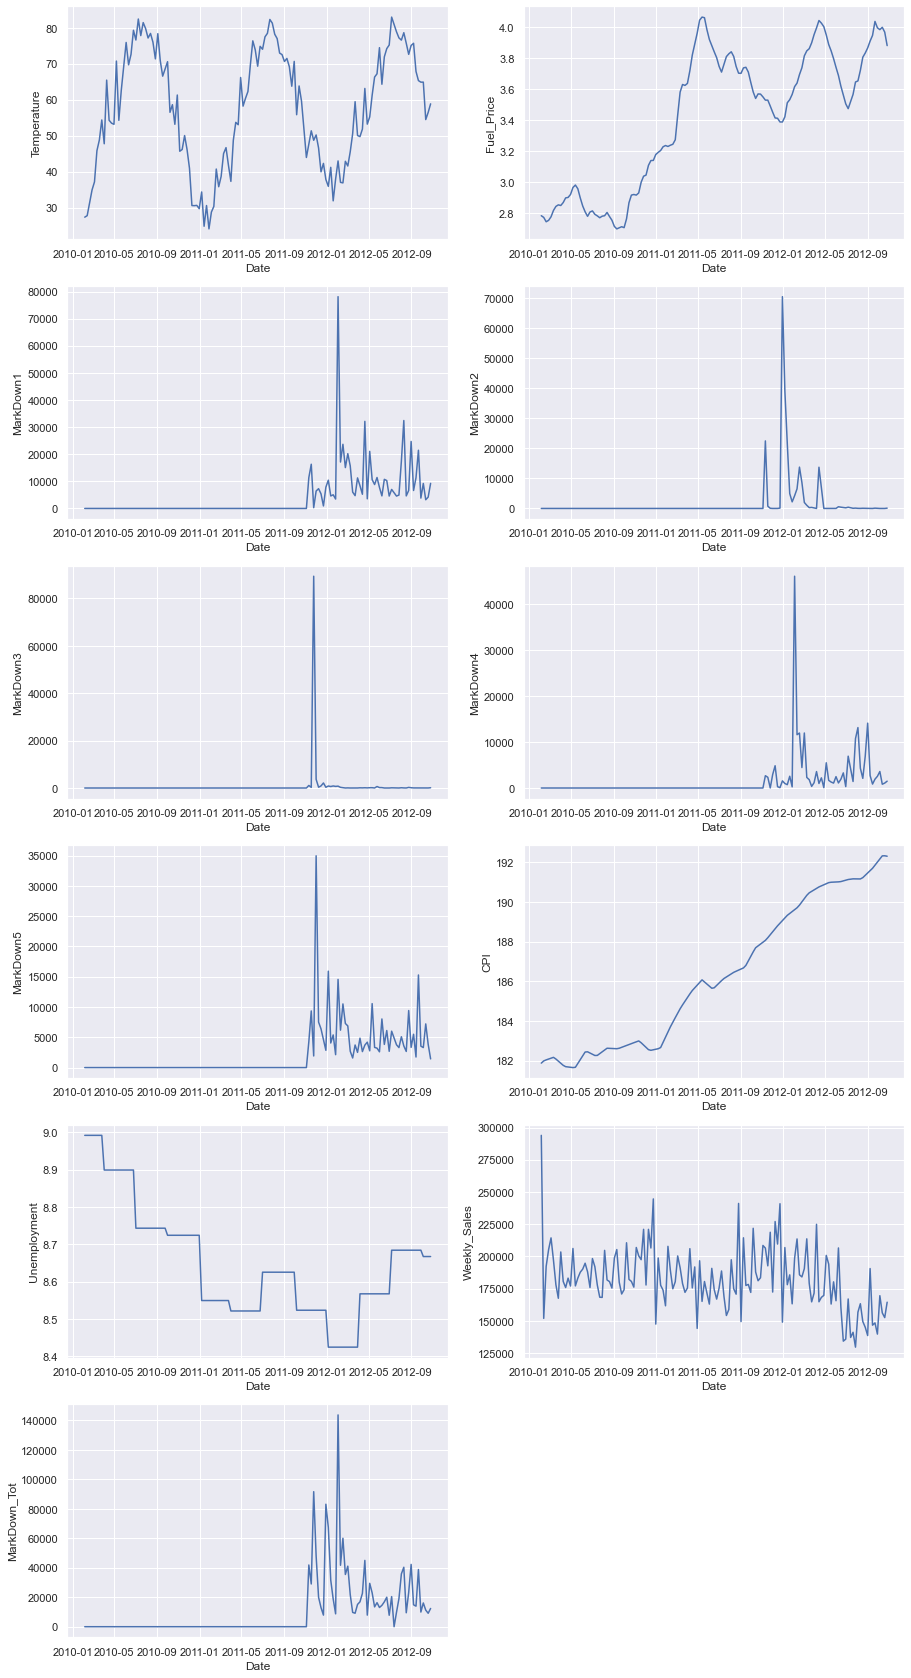

In [67]:
#plot all the numerical features to see if there is any trend/seasonatlity in terms of time
#set nrow, ncols for subplot
m=math.ceil(len(features)/2)
n=2
#set overall fig size
plt.figure(figsize=(15,30))
#plot individual columns(numerical features) vs time
for i in enumerate(features):
    plt.subplot(m,n,(i[0]+1))
    sns.lineplot(data=df_s14_d92, x="Date", y=i[1])

Based on the plots:
Temperature show clear annual seasonal trend;
Fuel price show trending pattern before 05/2011, maybe seasonal pattern afterwards
Markdowns have no values before sep/2011
CPI show trending pattern over the years
unemployment does not show a clear pattern, it seems the unemployment value is provided in seasonal basis
The weekly sales does not show a clear seasonal pattern, but need to be further checked 

#### 3.6.1.2 Seasonal Plots <a id='3.6.1.2_Seasonal_Plots'></a>

<AxesSubplot:xlabel='Week', ylabel='Weekly_Sales'>

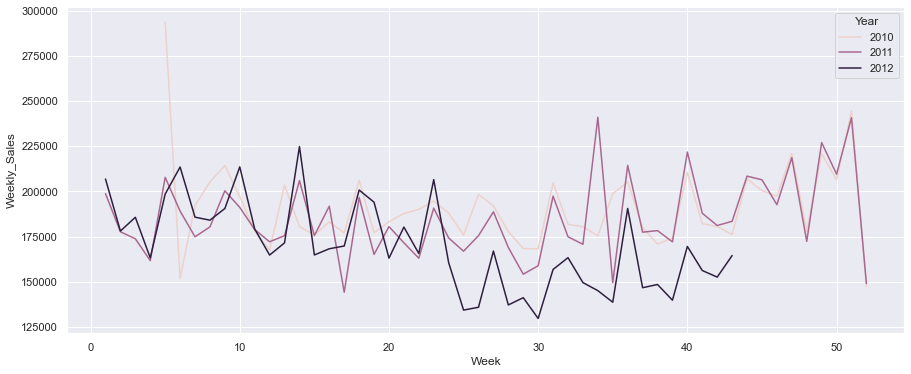

In [68]:
#seasonal plot by year
#plot weekly_sales on weekly basis for different years
fig, ax = plt.subplots(figsize=(15, 6))
sns.lineplot(x='Week',y='Weekly_Sales', data=df_s14_d92, hue='Year')

<AxesSubplot:xlabel='Month', ylabel='Weekly_Sales'>

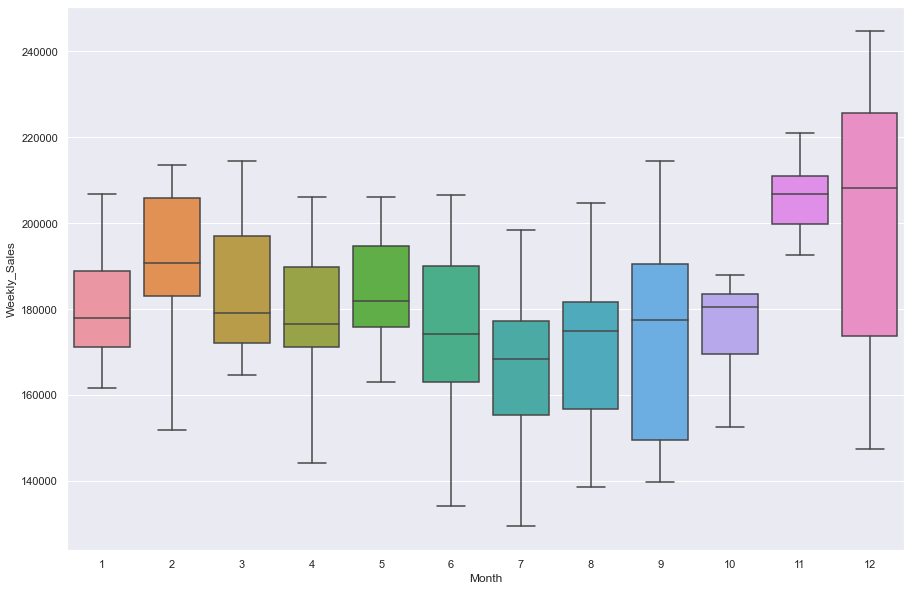

In [69]:
#seasonal plot by Month
#plot boxplot of sales data based on different Month
sns.boxplot(x="Month", y="Weekly_Sales", showfliers=False, data=df_s14_d92)

There seem to be a sinusoidal pattern of weekly_sales across the month, Nov,Dec has highest sales throughout the year

#### 3.6.1.3 Autocorrelation of Weekly_Sales <a id='3.6.1.3_Autocorrelation_of_Weekly_Sales'></a>

In [70]:
#Only select Weekly_sales cols
weekly_sales=df_s14_d92.loc[:,['Weekly_Sales']]
weekly_sales

,Weekly_Sales
136890,293966.05
136891,151901.21
136892,192282.19
136893,205250.96
136894,214383.07
...,...
137028,139707.80
137029,169519.23
137030,156174.21
137031,152511.55


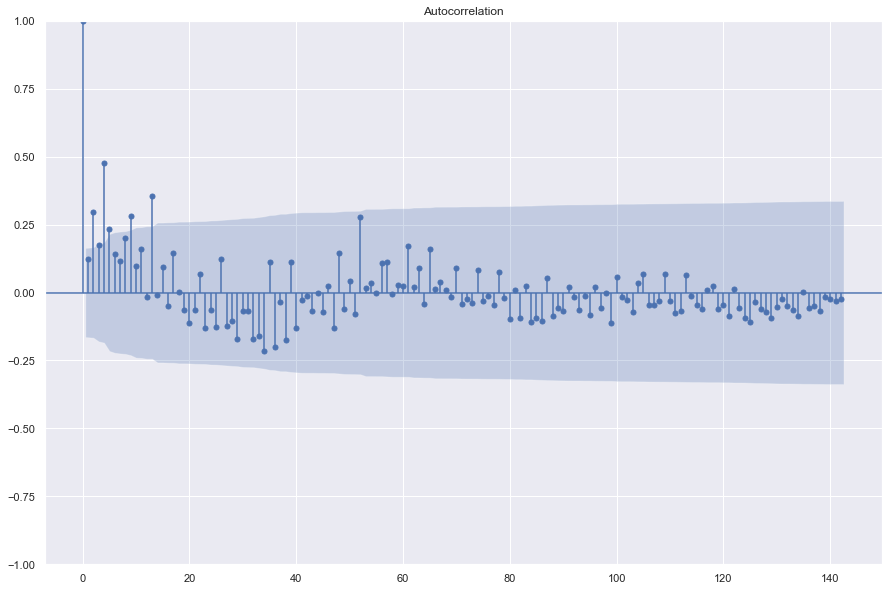

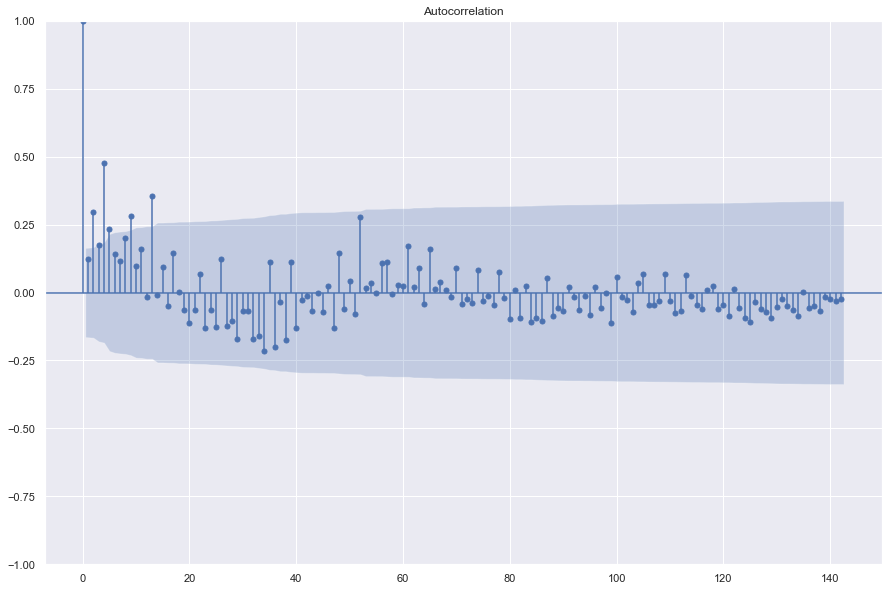

In [71]:
#plot autocorrelation for weekly_sales
plot_acf(weekly_sales, lags= 142, alpha=0.05) 

no strong correlation found in this time series, except for lag 2, 4, 12

#### 3.6.1.4 Lag Plots of Weekly_Sales <a id='3.6.1.4_Lag_Plots_of_Weekly_Sales'></a>

In [72]:
#Based on the anlysis of autocorrelation, lad 2,4, 12 show higher correlation, lag plot is built based on these analysis
lag_list=[2,4,12]
fig, ax = plt.subplots(nrows=int(len(lag_list)), ncols=1, figsize=(20,15)) 
for i in lag_list:
    pd.plotting.lag_plot(weekly_sales.Weekly_Sales, lag=i,ax=ax[lag_list.index(i)] #why use flat:https://stackoverflow.com/questions/37967786/axes-from-plt-subplots-is-a-numpy-ndarray-object-and-has-no-attribute-plot
    

SyntaxError: unexpected EOF while parsing (1660879885.py, line 6)

#### 3.6.1.5 Pair Plots of Weekly_Sales <a id='3.6.1.5_Pair_Plots_of_Weekly_Sales'></a>

In [73]:
df_s14_d92.dtypes

Date            datetime64[ns]
Store                    int64
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
Holiday                 object
Dept                     int64
Weekly_Sales           float64
Type                    object
Size                     int64
Year                     int64
Month                    int64
Week                    UInt32
Weekday                  int64
Season                   int64
Holiday_name            object
MarkDown_Tot           float64
dtype: object

In [74]:
#select numerical features for pairplots
numeric_features=list(df_s14_d92.select_dtypes(include=['float64','int64','UInt32']).columns)
numeric_features

['Store',
 'Temperature',
 'Fuel_Price',
 'MarkDown1',
 'MarkDown2',
 'MarkDown3',
 'MarkDown4',
 'MarkDown5',
 'CPI',
 'Unemployment',
 'Dept',
 'Weekly_Sales',
 'Size',
 'Year',
 'Month',
 'Week',
 'Weekday',
 'Season',
 'MarkDown_Tot']

In [75]:
#remove markdown1-5 from numerical features since markdowns is somehow correlated with markdown_tot(sec 3.5.6.1, only keep markdown_tot
del numeric_features[3:8]
numeric_features

['Store',
 'Temperature',
 'Fuel_Price',
 'CPI',
 'Unemployment',
 'Dept',
 'Weekly_Sales',
 'Size',
 'Year',
 'Month',
 'Week',
 'Weekday',
 'Season',
 'MarkDown_Tot']

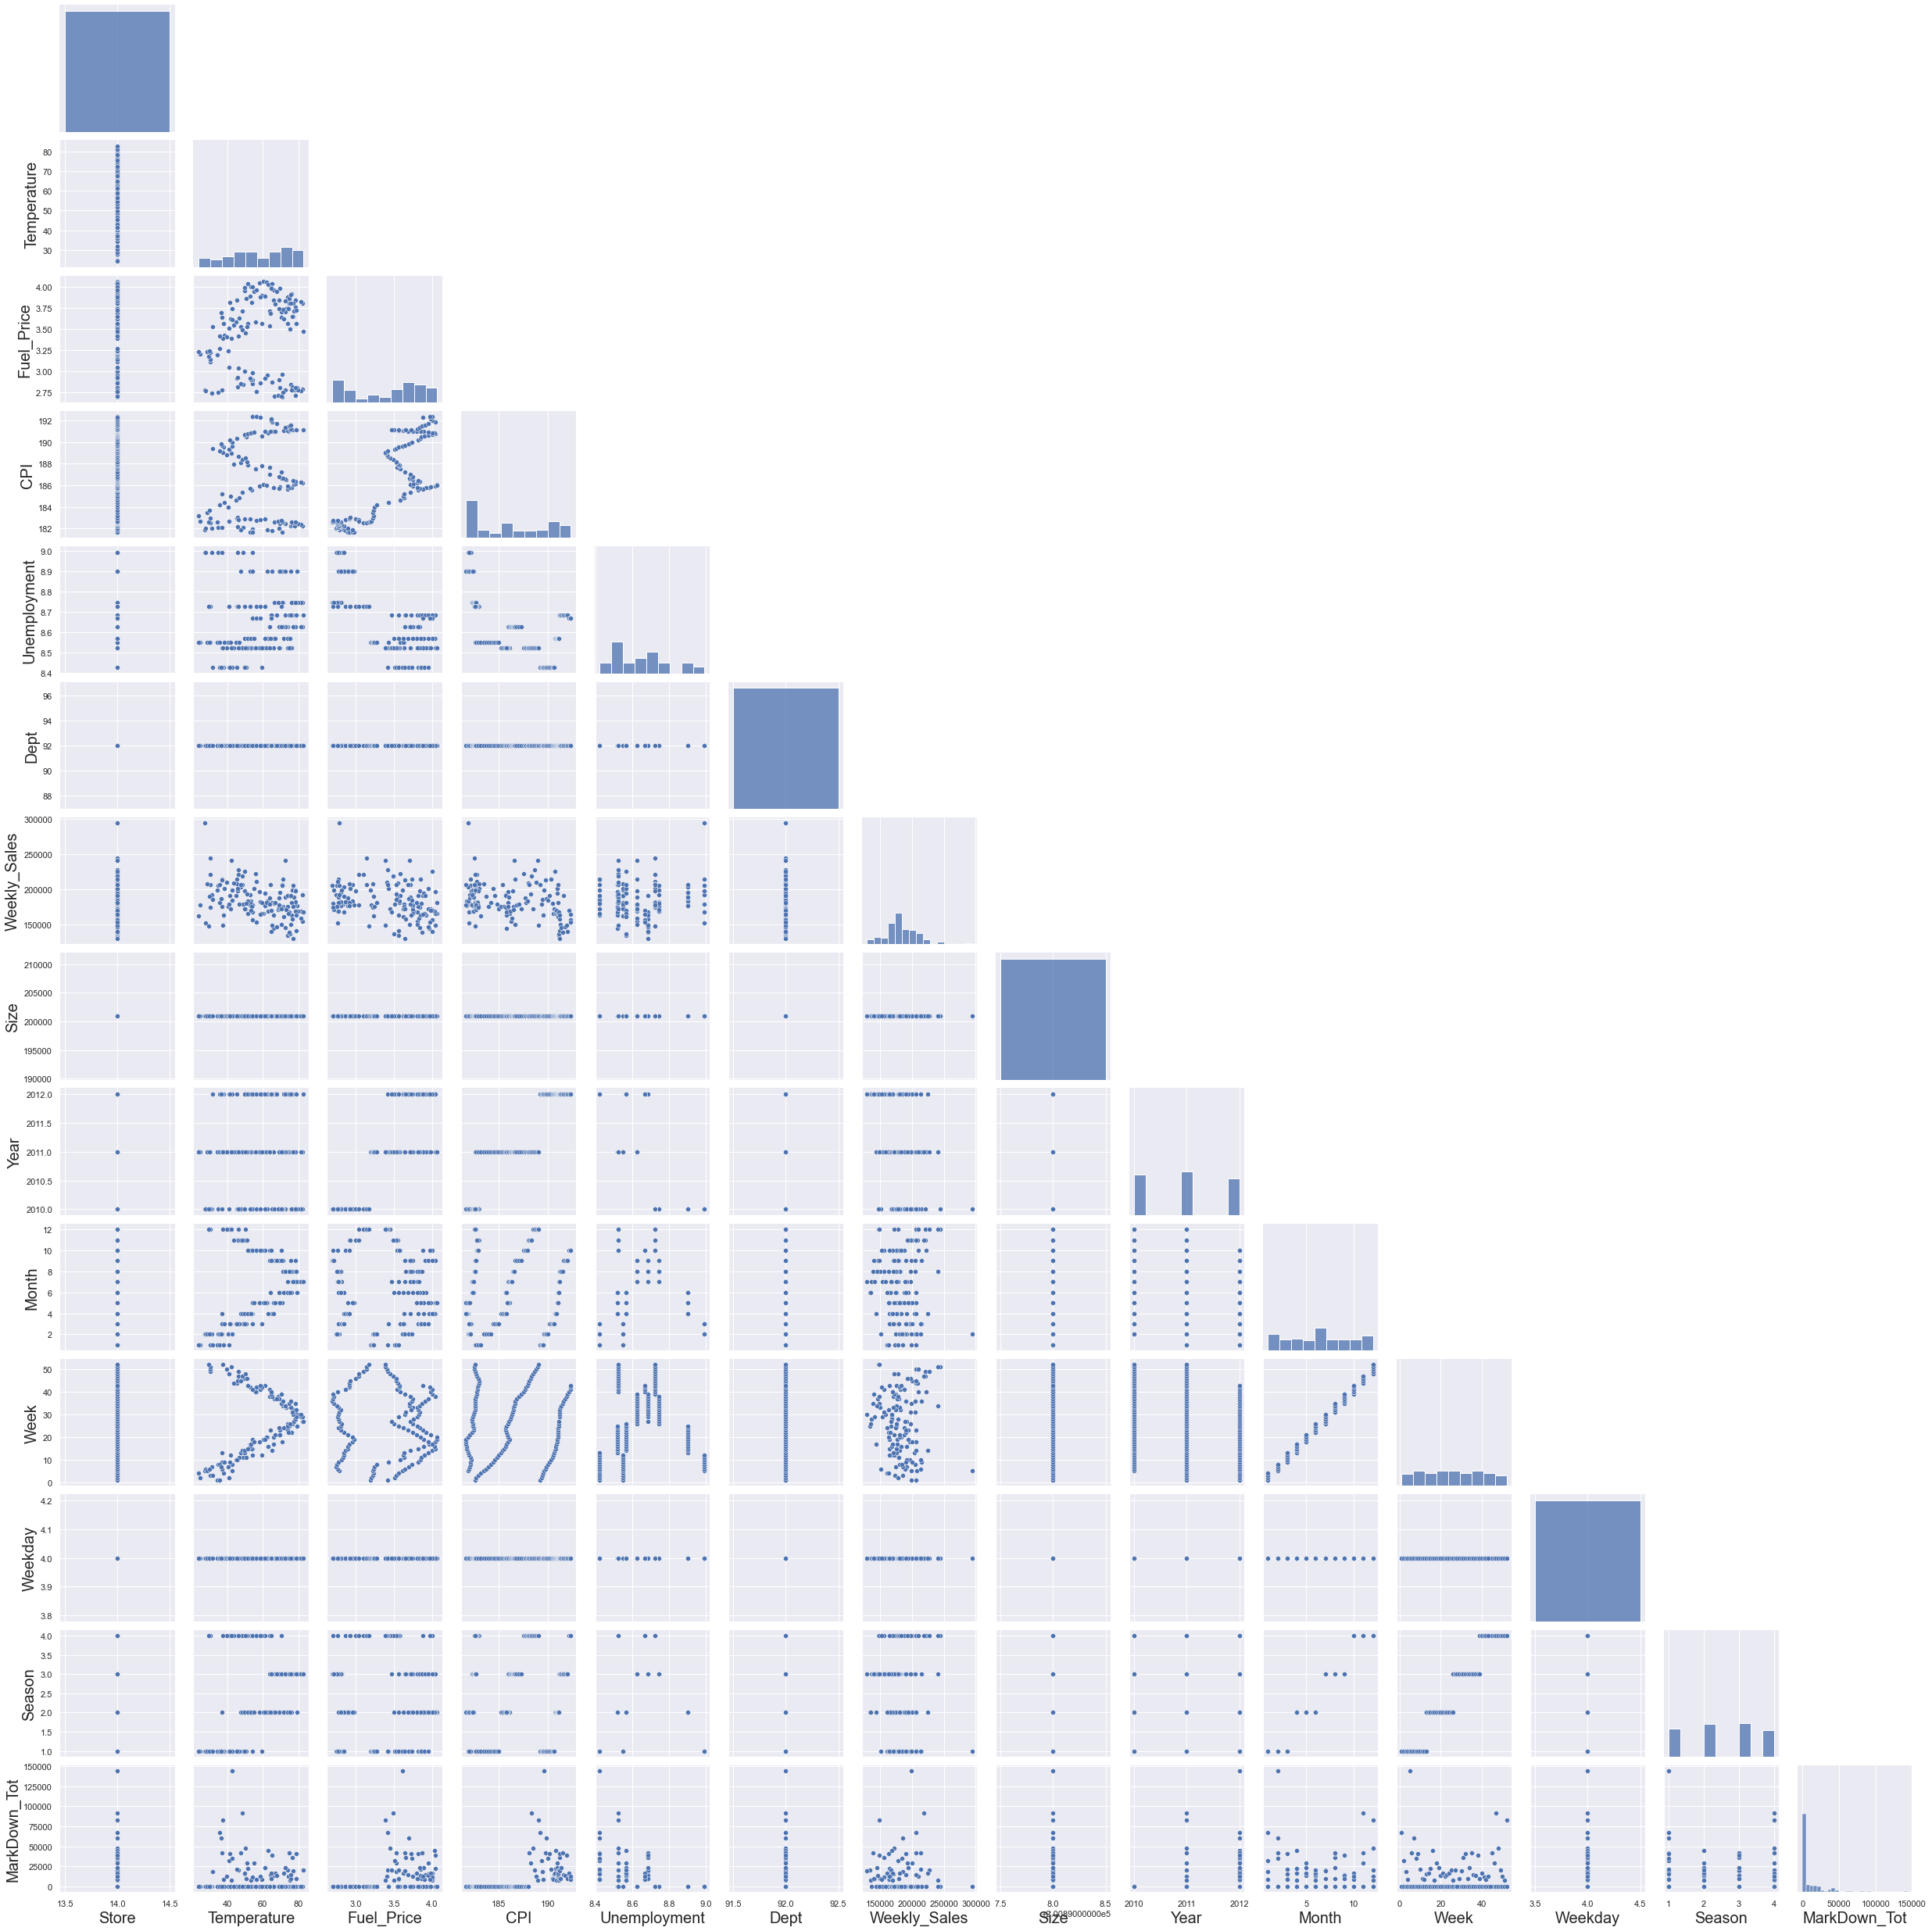

In [76]:
#plot pairplot to check correlations between different features
with sns.plotting_context(rc={"axes.labelsize":20}):
    sns.pairplot(df_s14_d92[numeric_features],corner=True)
#https://stackoverflow.com/questions/69679508/how-to-change-fontsize-of-only-x-or-y-labels-in-seaborn-pairplot

In [77]:
#remove store,dept, weekday and size from numeric features

#https://www.tutorialstonight.com/python-remove-multiple-items-from-list
unwanted=['Store','Size','Dept','Weekday']
numeric_features=list(set(numeric_features)-set(unwanted))

#remove store,dept, weekday and size from num
print(numeric_features)


['MarkDown_Tot', 'Weekly_Sales', 'Month', 'Season', 'Unemployment', 'Year', 'Week', 'Temperature', 'CPI', 'Fuel_Price']


In [78]:
df_s14_d92[numeric_features]

,MarkDown_Tot,Weekly_Sales,Month,Season,Unemployment,Year,Week,Temperature,CPI,Fuel_Price
136890,0.00,293966.05,2,1,8.992,2010,5,27.31,181.871190,2.784
136891,0.00,151901.21,2,1,8.992,2010,6,27.73,181.982317,2.773
136892,0.00,192282.19,2,1,8.992,2010,7,31.27,182.034782,2.745
136893,0.00,205250.96,2,1,8.992,2010,8,34.89,182.077469,2.754
136894,0.00,214383.07,3,1,8.992,2010,9,37.13,182.120157,2.777
...,...,...,...,...,...,...,...,...,...,...
137028,9944.17,139707.80,9,3,8.684,2012,39,64.88,192.013558,3.997
137029,16123.75,169519.23,10,4,8.667,2012,40,64.89,192.170412,3.985
137030,11265.27,156174.21,10,4,8.667,2012,41,54.47,192.327265,4.000
137031,9126.44,152511.55,10,4,8.667,2012,42,56.47,192.330854,3.969


[]

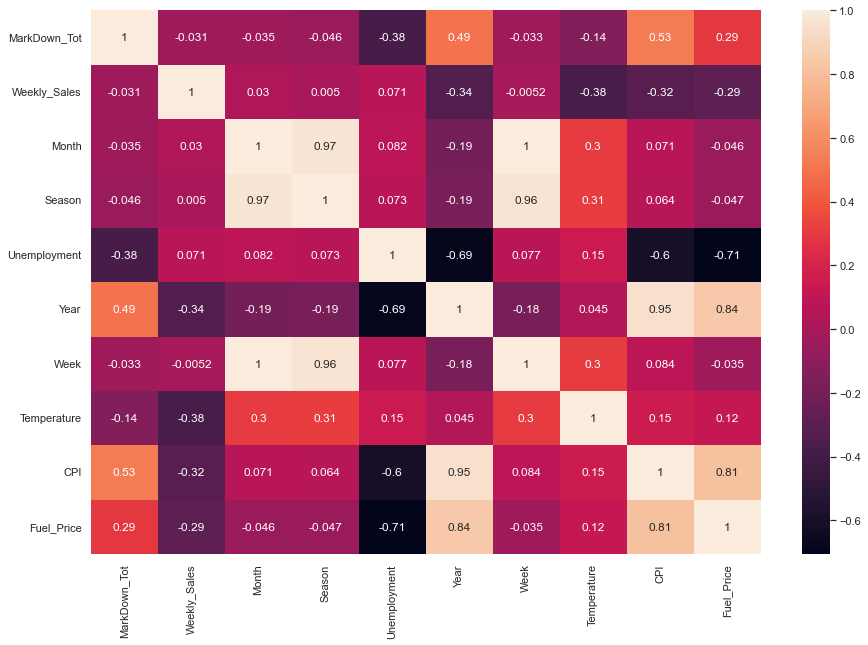

In [79]:
#create correlation heatmap for different features
corr_s14_d92 = df_s14_d92[numeric_features].corr(method='pearson')
plt.figure(figsize=(15, 10))
sns.heatmap(corr_s14_d92, annot=True)
plt.plot()

Store, dept, size and weekday is constant for specific store/dept, these features can be removed from the pairplot 
weekly_sales seem to have some correlation with temepreture, fuel price, CPI, no apparent pattern found between markdown_tot and sales

### 3.6.2 Time Series With Time Gap<a id='3.6.2_Time_Series_With_Time_Gap'></a>

In [80]:
#take few examples of time series with different type of gaps
#missing week=missing gap(only one point missing) & missing_percent<10%, based on line 51, store 2/dept48
df_s2_d48=df_ts_FNL[(df_ts_FNL['Store']==2)&(df_ts_FNL['Dept']==48)]


In [81]:
#check missing values
df_s2_missing = pd.concat([df_s2_d48.isnull().sum(), 100 * df_s2_d48.isnull().mean()],axis=1)
df_s2_missing.columns=['count','%']
df_s2_missing

,count,%
Date,0,0.0
Store,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
MarkDown1,0,0.0
MarkDown2,0,0.0
MarkDown3,0,0.0
MarkDown4,0,0.0
MarkDown5,0,0.0
CPI,0,0.0


In [82]:
#reindex the date col, fill it with NAs
df_s2_d48.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name,MarkDown_Tot
16285,2010-02-05,2,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,...,2357.0,A,202307,2010,2,5,4,1,non-Holiday,0.0
16286,2010-02-12,2,38.49,2.548,0.0,0.0,0.0,0.0,0.0,210.897994,...,1405.0,A,202307,2010,2,6,4,1,Superbowl,0.0
16287,2010-02-19,2,39.69,2.514,0.0,0.0,0.0,0.0,0.0,210.945160,...,117.0,A,202307,2010,2,7,4,1,Washington’s Birthday,0.0
16288,2010-02-26,2,46.10,2.561,0.0,0.0,0.0,0.0,0.0,210.975957,...,2607.0,A,202307,2010,2,8,4,1,non-Holiday,0.0
16289,2010-03-05,2,47.17,2.625,0.0,0.0,0.0,0.0,0.0,211.006754,...,1275.0,A,202307,2010,3,9,4,1,non-Holiday,0.0


In [85]:
idx = pd.date_range('2/5/2010', periods=143, freq='W-FRI')

In [86]:
#https://thewebdev.info/2021/10/21/how-to-add-missing-dates-to-python-pandas-dataframe/
df_s2_d48.set_index('Date',inplace=True)

In [91]:
df_s2_d48_copy = df_s2_d48.reindex(idx, fill_value=0)

In [92]:
df_s2_d48_copy[(df_s2_d48_copy == 0).all(axis=1)]

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name,MarkDown_Tot
2010-03-12,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0.0
2010-05-28,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0.0
2010-07-16,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0.0
2011-06-24,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0.0
2012-06-15,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0,0,0,0,0,0,0,0,0.0


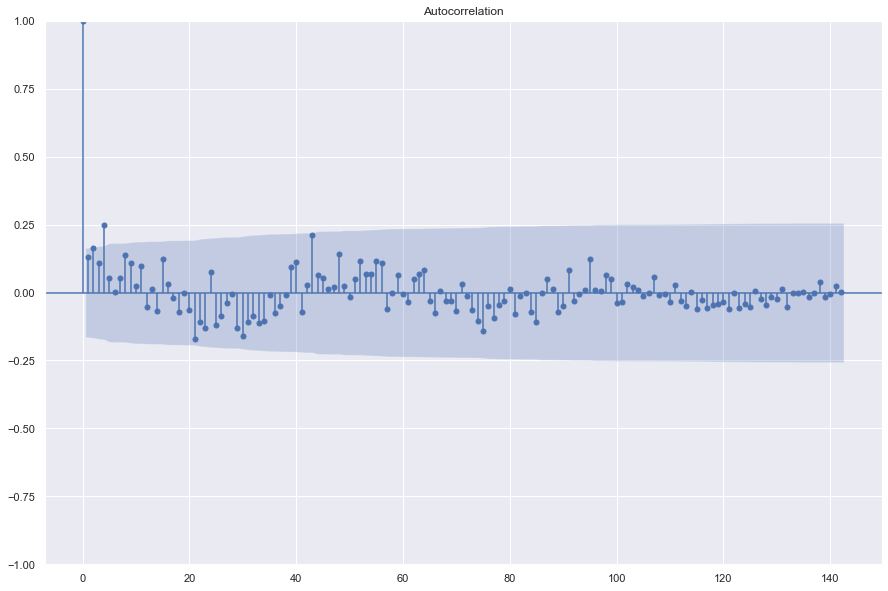

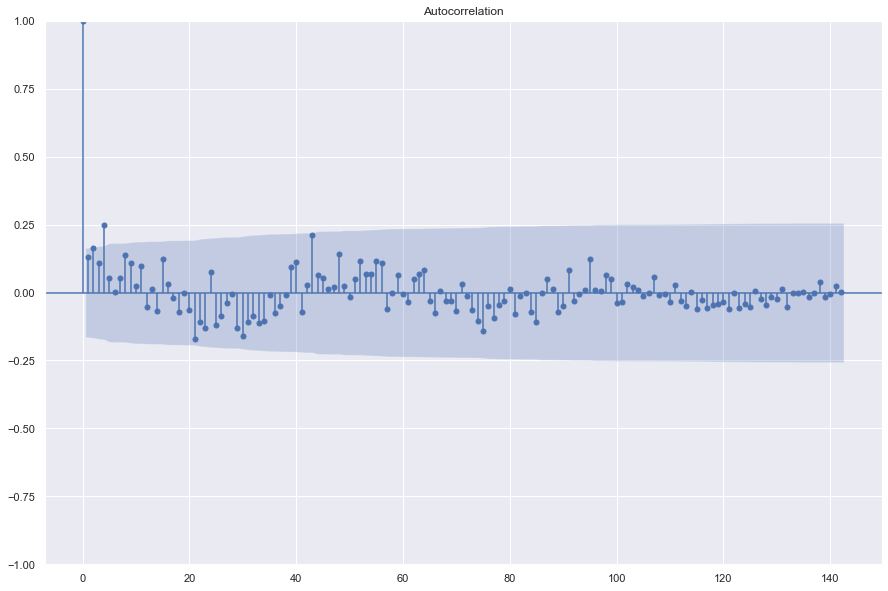

In [93]:
plot_acf(df_s2_d48_copy.Weekly_Sales, lags= 142, alpha=0.05)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='y(t)', ylabel='y(t + 1)'>

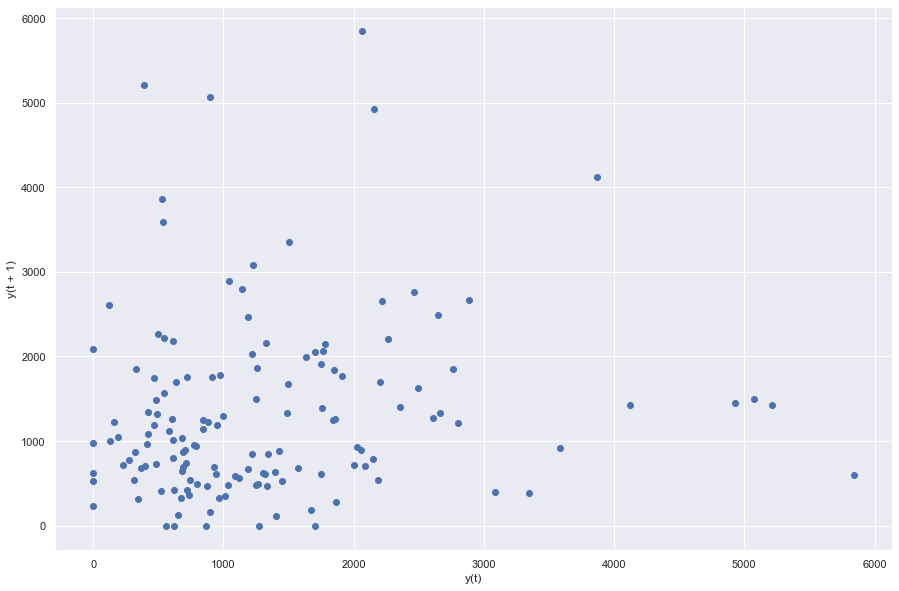

In [94]:
 pd.plotting.lag_plot(df_s2_d48_copy.Weekly_Sales, lag=1)

In [96]:
df_s2_d48_copy.reset_index(inplace=True)
df_s2_d48_copy.head()

,level_0,index,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,...,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name,MarkDown_Tot
0,0,2010-02-05,2,40.19,2.572,0.0,0.0,0.0,0.0,0.0,...,2357.0,A,202307,2010,2,5,4,1,non-Holiday,0.0
1,1,2010-02-12,2,38.49,2.548,0.0,0.0,0.0,0.0,0.0,...,1405.0,A,202307,2010,2,6,4,1,Superbowl,0.0
2,2,2010-02-19,2,39.69,2.514,0.0,0.0,0.0,0.0,0.0,...,117.0,A,202307,2010,2,7,4,1,Washington’s Birthday,0.0
3,3,2010-02-26,2,46.10,2.561,0.0,0.0,0.0,0.0,0.0,...,2607.0,A,202307,2010,2,8,4,1,non-Holiday,0.0
4,4,2010-03-05,2,47.17,2.625,0.0,0.0,0.0,0.0,0.0,...,1275.0,A,202307,2010,3,9,4,1,non-Holiday,0.0


In [97]:
df_s2_d48_copy=df_s2_d48_copy.iloc[:,1:]
df_s2_d48_copy.rename(columns={'index':'Date'},inplace=True)
df_s2_d48_copy.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name,MarkDown_Tot
0,2010-02-05,2,40.19,2.572,0.0,0.0,0.0,0.0,0.0,210.752605,...,2357.0,A,202307,2010,2,5,4,1,non-Holiday,0.0
1,2010-02-12,2,38.49,2.548,0.0,0.0,0.0,0.0,0.0,210.897994,...,1405.0,A,202307,2010,2,6,4,1,Superbowl,0.0
2,2010-02-19,2,39.69,2.514,0.0,0.0,0.0,0.0,0.0,210.945160,...,117.0,A,202307,2010,2,7,4,1,Washington’s Birthday,0.0
3,2010-02-26,2,46.10,2.561,0.0,0.0,0.0,0.0,0.0,210.975957,...,2607.0,A,202307,2010,2,8,4,1,non-Holiday,0.0
4,2010-03-05,2,47.17,2.625,0.0,0.0,0.0,0.0,0.0,211.006754,...,1275.0,A,202307,2010,3,9,4,1,non-Holiday,0.0


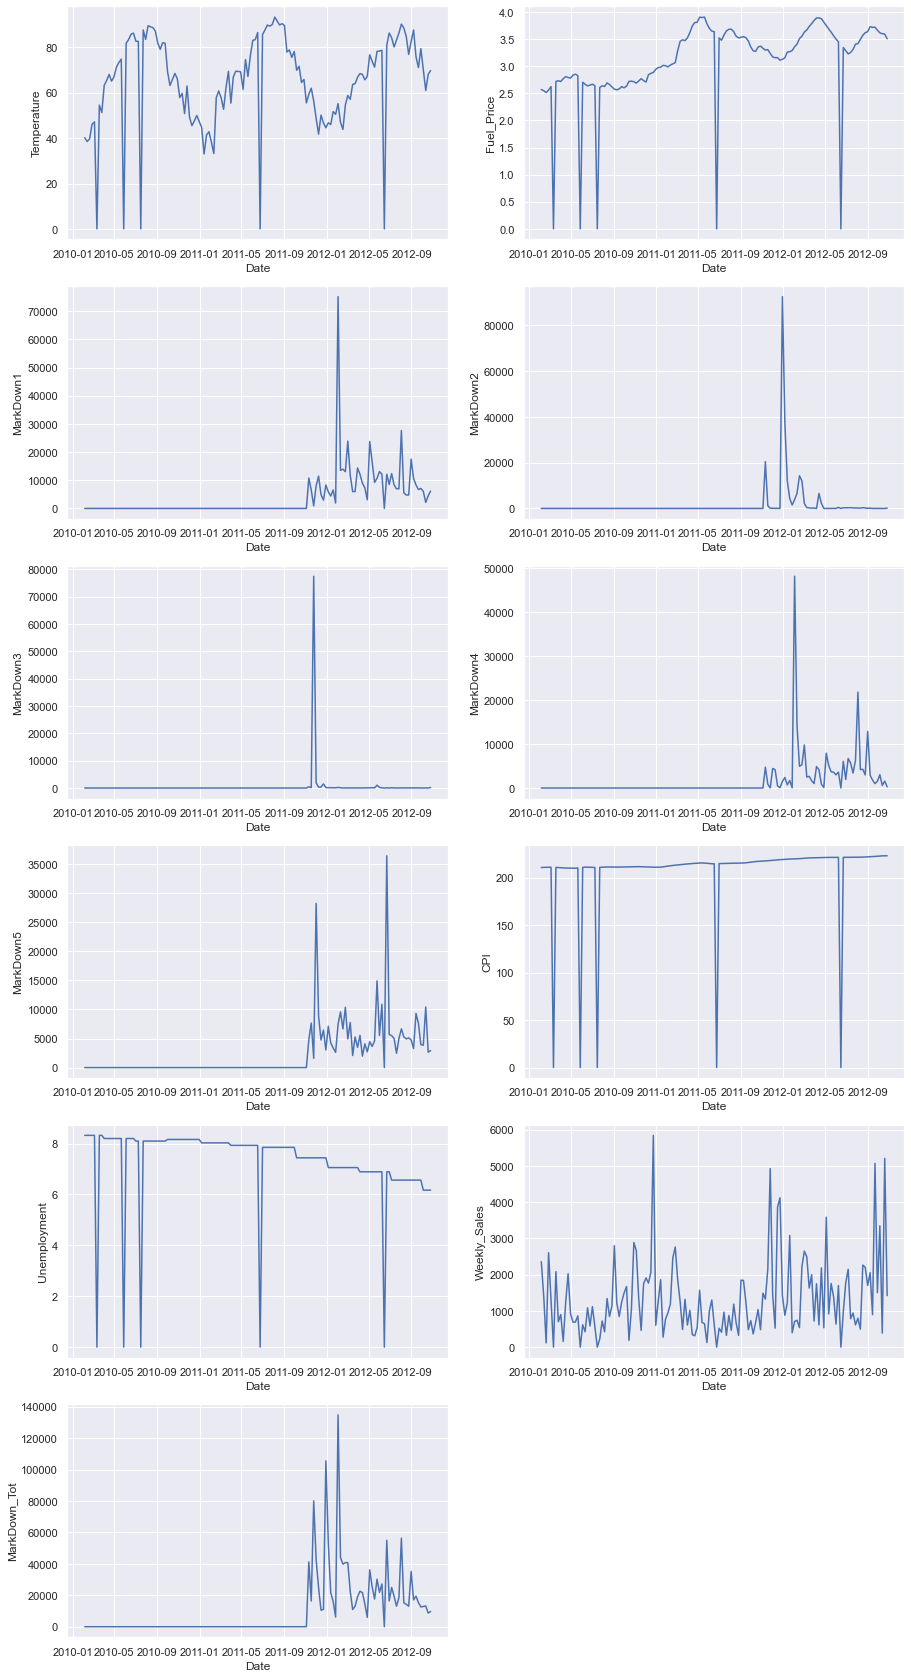

In [98]:
#plot all the numerical features to see if there is any trend/seasonatlity in terms of time
#set nrow, ncols for subplot
df_s2_d48_copy.reset_index(inplace=True)
m=math.ceil(len(features)/2)
n=2
#set overall fig size
plt.figure(figsize=(15,30))
#plot individual columns(numerical features) vs time
for i in enumerate(features):
    plt.subplot(m,n,(i[0]+1))
    sns.lineplot(data=df_s2_d48_copy, x="Date", y=i[1])

In [99]:
#instead of fill gap with 0s, use 'FF'
#https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.reindex.html
df_s2_d48_ffill = df_s2_d48.reindex(idx, method='ffill')

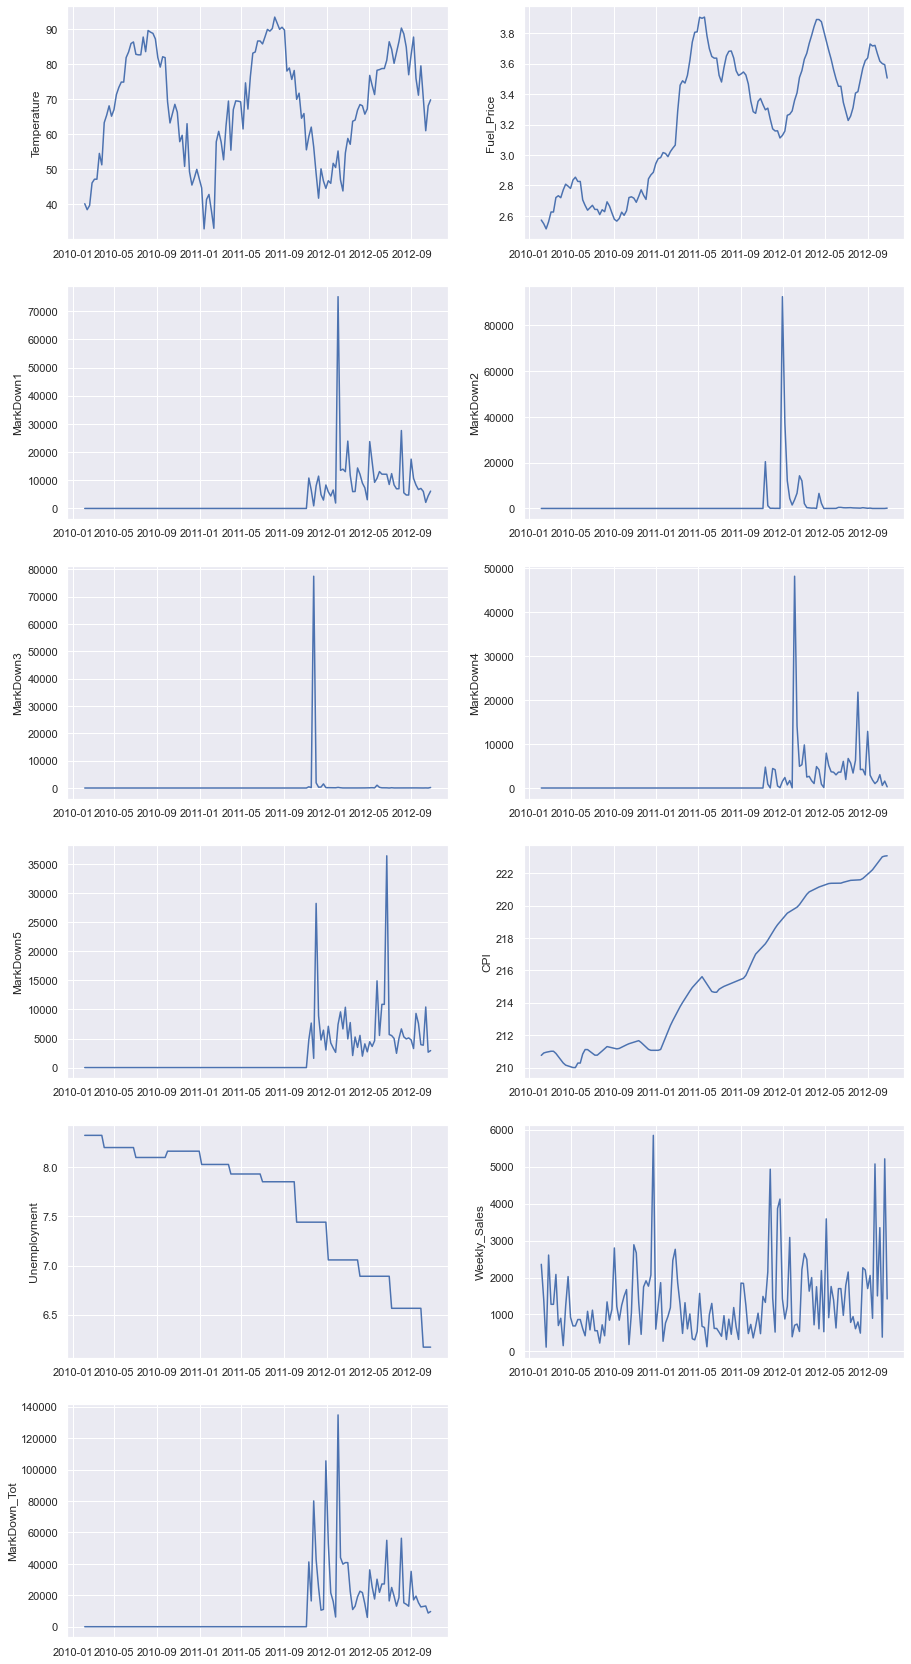

In [101]:
#set overall fig size
plt.figure(figsize=(15,30))
#plot individual columns(numerical features) vs time
for i in enumerate(features):
    plt.subplot(m,n,(i[0]+1))
    sns.lineplot(data=df_s2_d48_ffill, x=df_s2_d48_ffill.index, y=i[1])

In [102]:
#missing week>>missing gap(large gap, multiple point missing) & missing_percent<10%
df_ts_missing_merge.head()

missing_weeks  missing_percent  missing_gap
Store Dept                                             
1     6                 1         0.006993          1.0
      18               31         0.216783         31.0
      45               72         0.503497         72.0
      47              130         0.909091        126.0
      48               19         0.132867         19.0

In [103]:
df_ts_missing_merge[(df_ts_missing_merge.missing_weeks>df_ts_missing_merge.missing_gap)&(df_ts_missing_merge.missing_percent<0.1)]

,,missing_weeks,missing_percent,missing_gap
Store,Dept,,,
15,80,9,0.062937,7.0
18,54,14,0.097902,13.0
21,54,12,0.083916,11.0
23,80,14,0.097902,12.0
27,60,12,0.083916,6.0
33,12,12,0.083916,11.0
37,6,10,0.069930,9.0
38,85,3,0.020979,2.0
45,94,9,0.062937,8.0


In [104]:
#store 27/dept 60 was selected since missing weeks>> missing_gap, indicating a large gap, fill_value method might be different
df_s27_d60=df_ts_FNL[(df_ts_FNL['Store']==27)&(df_ts_FNL['Dept']==60)]
df_s27_d60.head()

,Date,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,...,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name,MarkDown_Tot
263169,2010-03-19,27,49.04,2.960,0.0,0.0,0.0,0.0,0.0,135.668225,...,7.0,A,204184,2010,3,11,4,1,non-Holiday,0.0
263170,2010-05-07,27,69.02,3.095,0.0,0.0,0.0,0.0,0.0,135.962000,...,17.6,A,204184,2010,5,18,4,2,non-Holiday,0.0
263171,2010-05-14,27,53.82,3.112,0.0,0.0,0.0,0.0,0.0,136.010394,...,88.0,A,204184,2010,5,19,4,2,non-Holiday,0.0
263172,2010-05-21,27,63.31,3.096,0.0,0.0,0.0,0.0,0.0,136.079652,...,52.8,A,204184,2010,5,20,4,2,non-Holiday,0.0
263173,2010-05-28,27,67.88,3.046,0.0,0.0,0.0,0.0,0.0,136.148910,...,52.8,A,204184,2010,5,21,4,2,non-Holiday,0.0


In [105]:
#check missing values
df_s27_missing = pd.concat([df_s27_d60.isnull().sum(), 100 * df_s27_d60.isnull().mean()],axis=1)
df_s27_missing.columns=['count','%']
df_s27_missing

,count,%
Date,0,0.0
Store,0,0.0
Temperature,0,0.0
Fuel_Price,0,0.0
MarkDown1,0,0.0
MarkDown2,0,0.0
MarkDown3,0,0.0
MarkDown4,0,0.0
MarkDown5,0,0.0
CPI,0,0.0


In [110]:
#reindex the df with idx (set time range and intervals), fill missing date with na
df_s27_d60.set_index('Date',inplace=True)
df_s27_d60_na = df_s27_d60.reindex(idx, fill_value=np.nan)

In [111]:
#find rows with fill NAs to check if it matches with missing weeks provided previously
df_s27_d60_na[df_s27_d60_na.isnull().any(axis=1)]

,Store,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,...,Weekly_Sales,Type,Size,Year,Month,Week,Weekday,Season,Holiday_name,MarkDown_Tot
2010-02-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-02-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-02-19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-02-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-03-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-03-12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-04-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-04-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN
2010-04-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,NaN


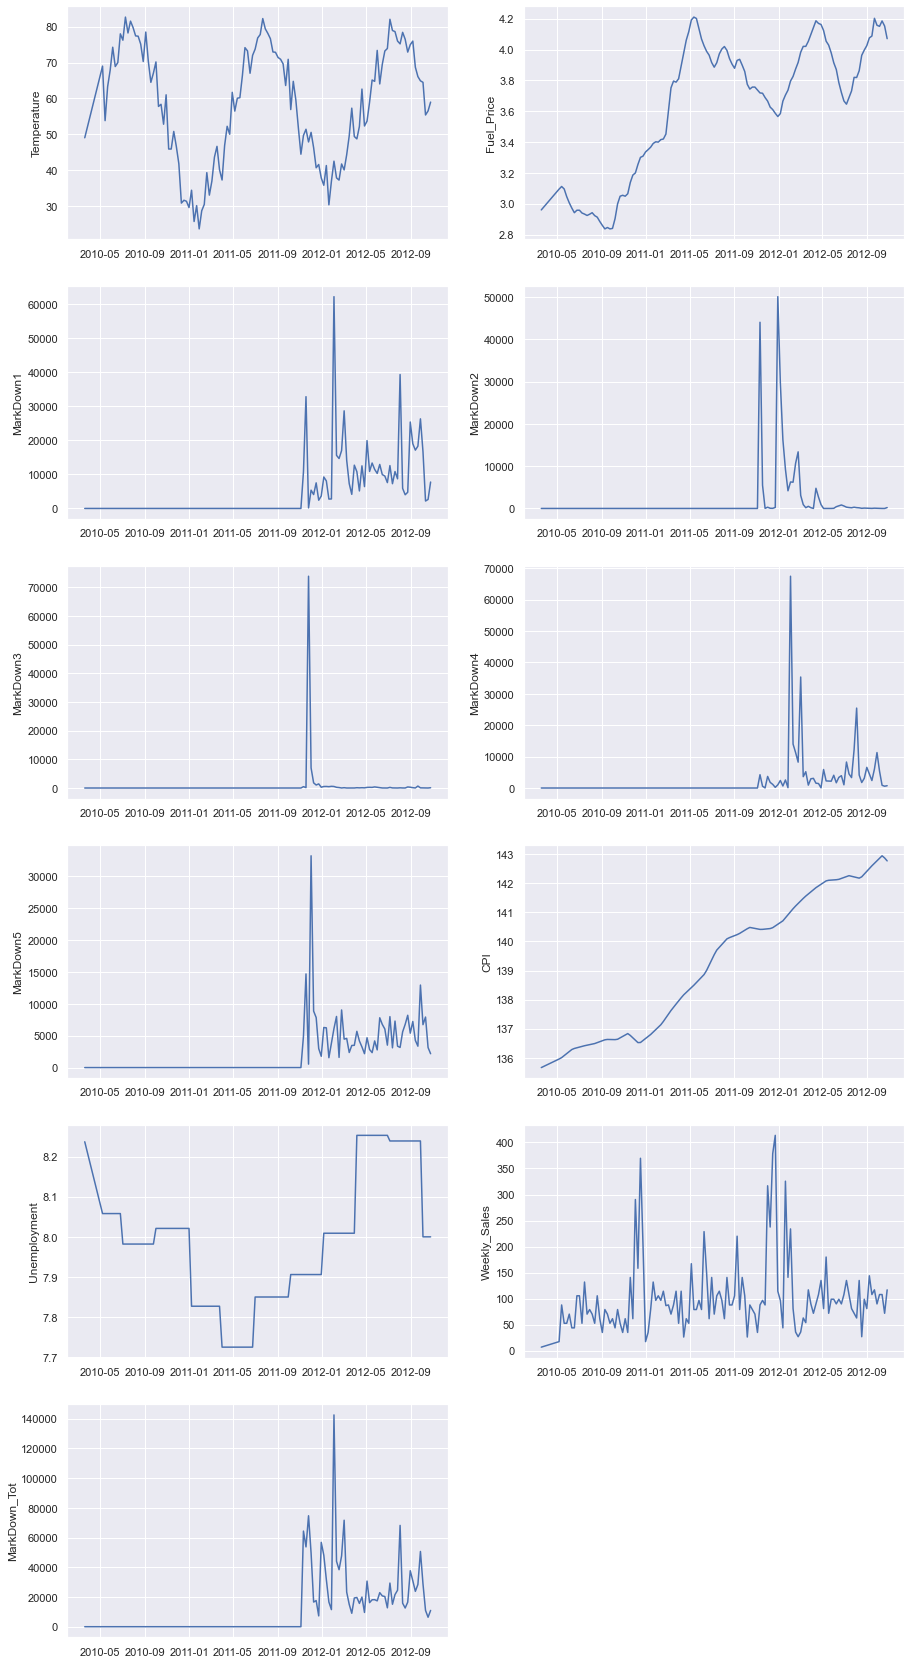

In [112]:
#set overall fig size
plt.figure(figsize=(15,30))
#plot individual columns(numerical features) vs time
for i in enumerate(features):
    plt.subplot(m,n,(i[0]+1))
    sns.lineplot(data=df_s27_d60_na, x=df_s27_d60_na.index, y=i[1])